In [1]:
from OrgansUtils import *

### Visualisation

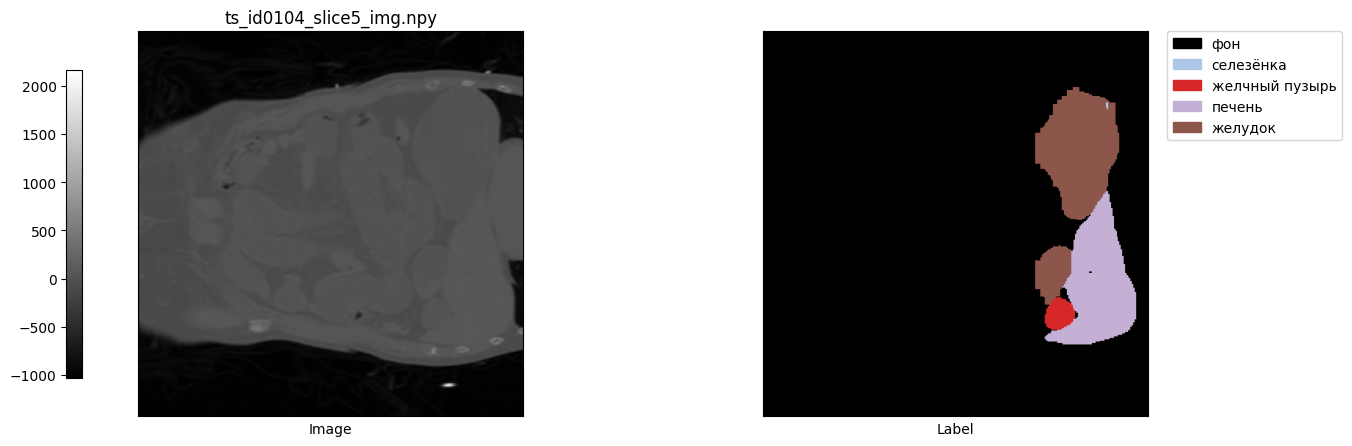

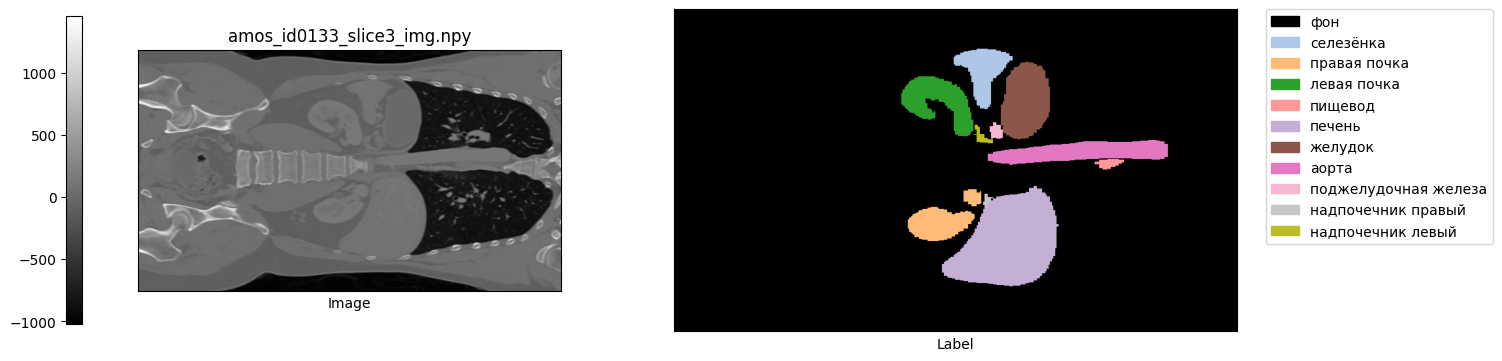

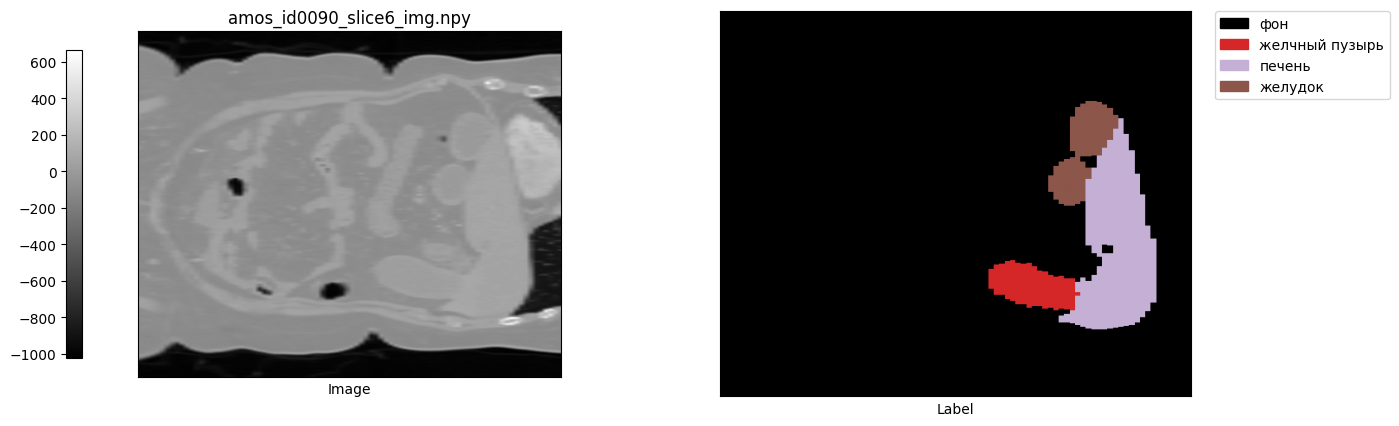

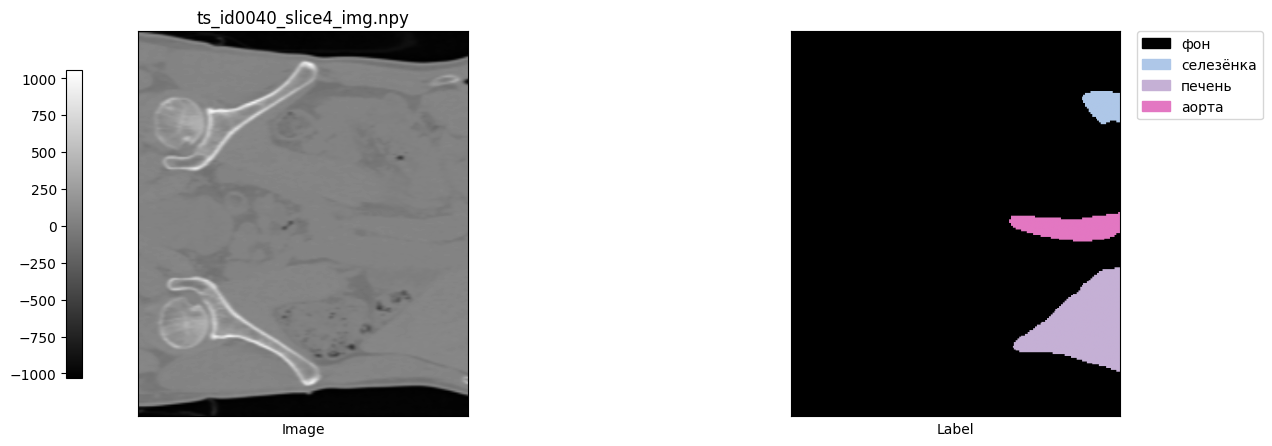

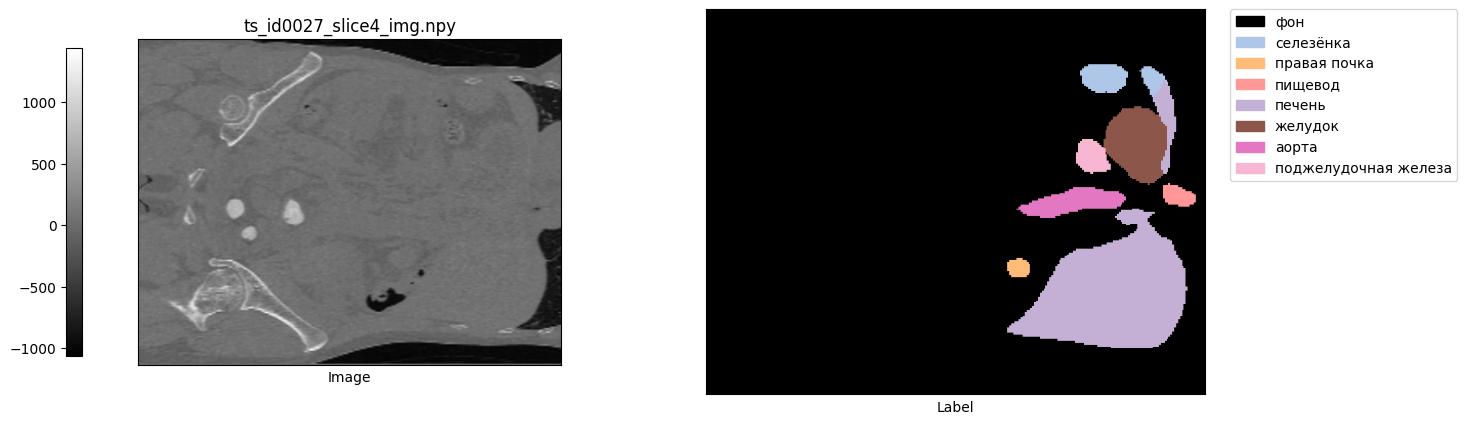

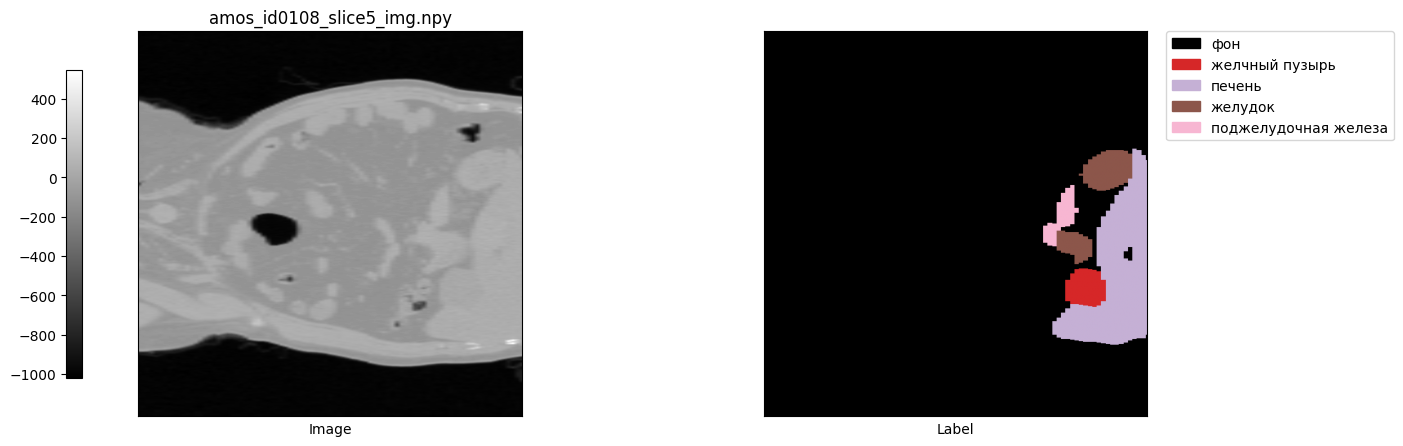

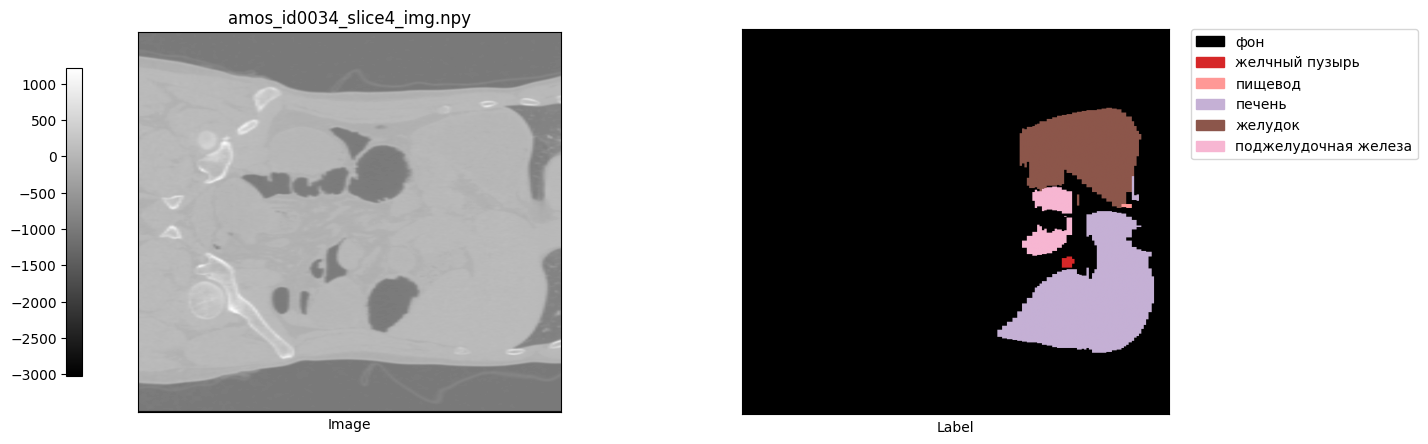

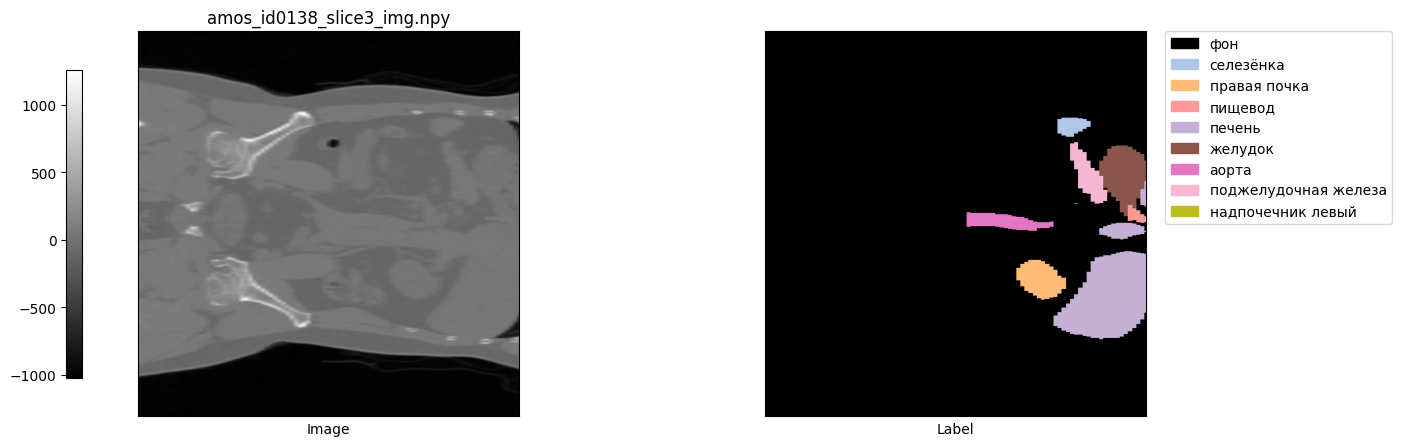

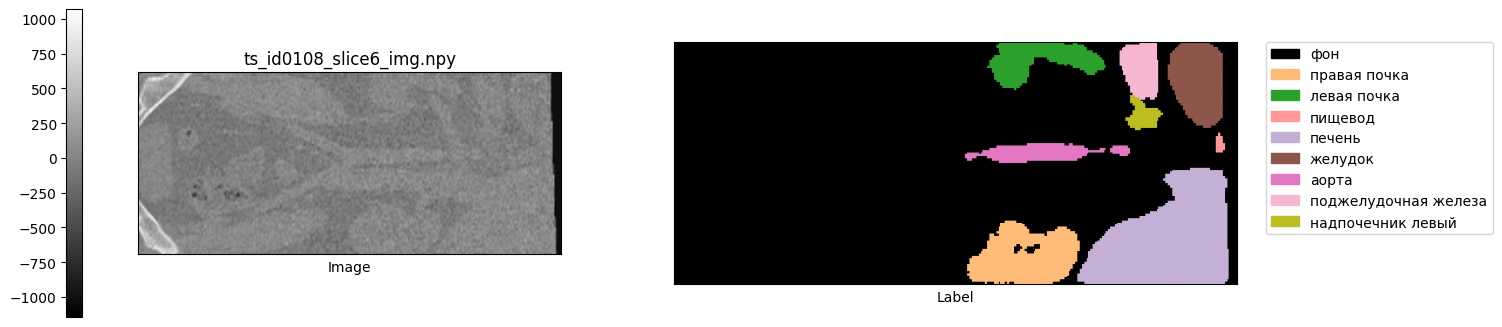

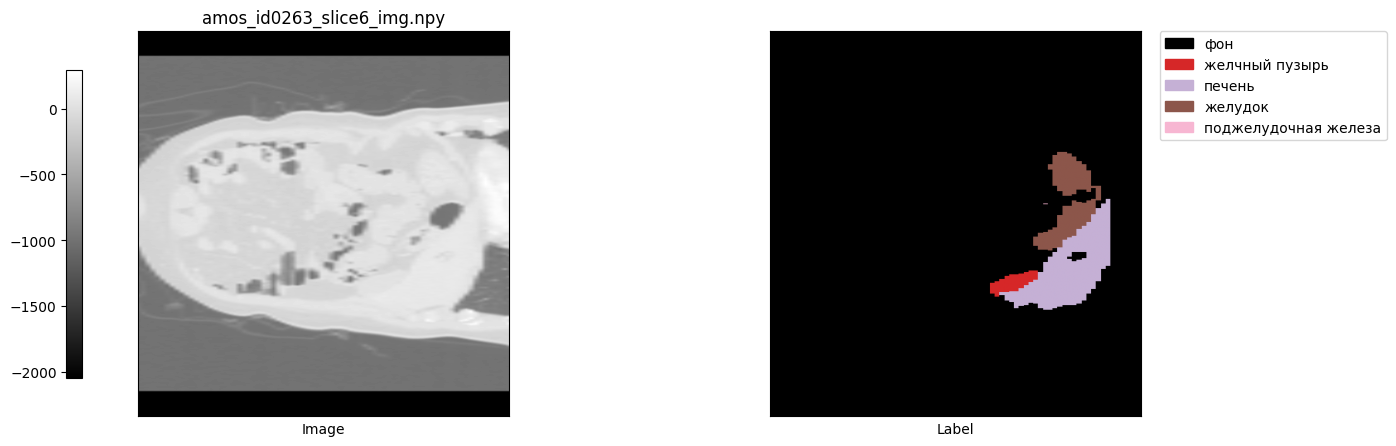

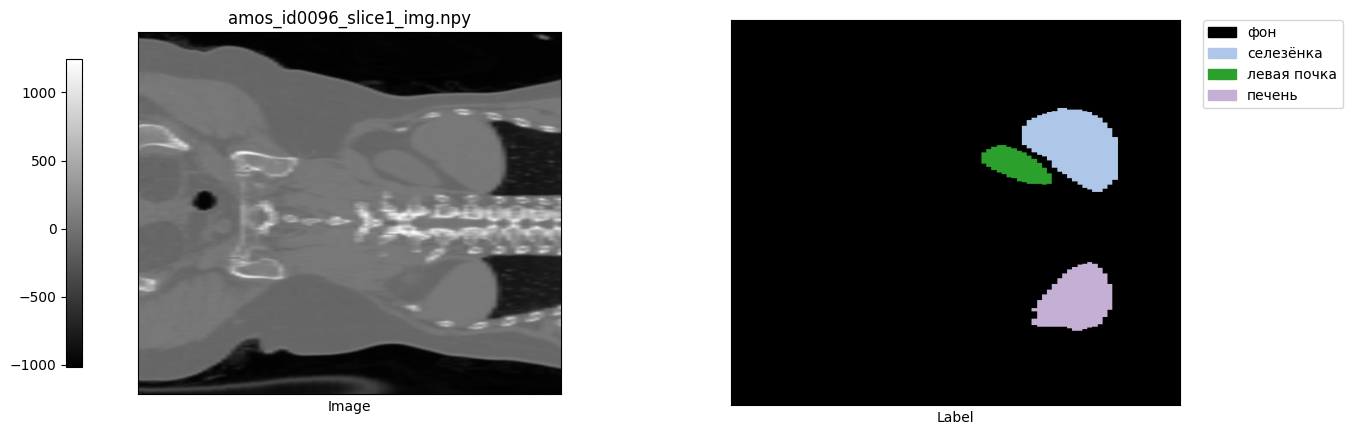

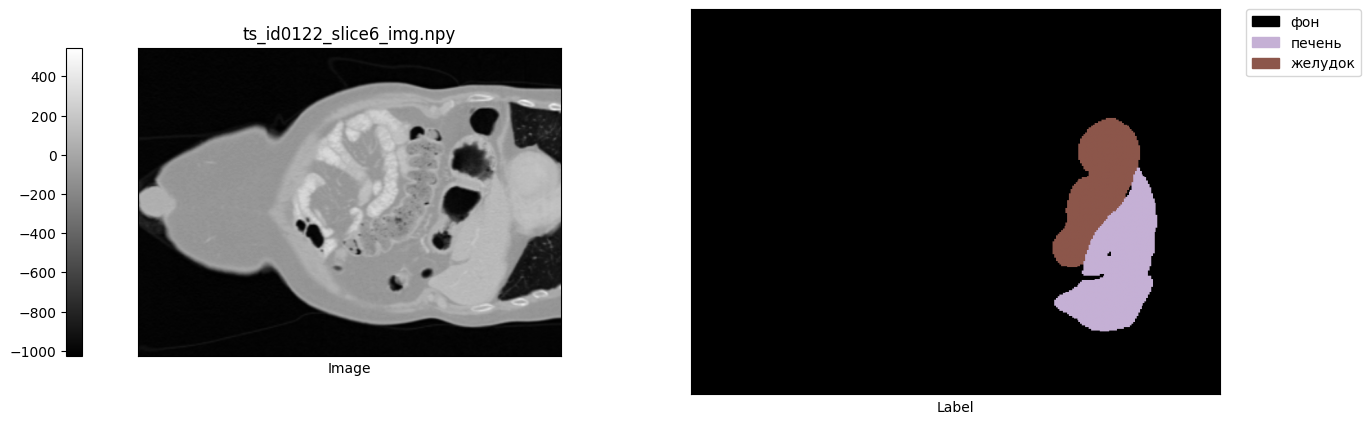

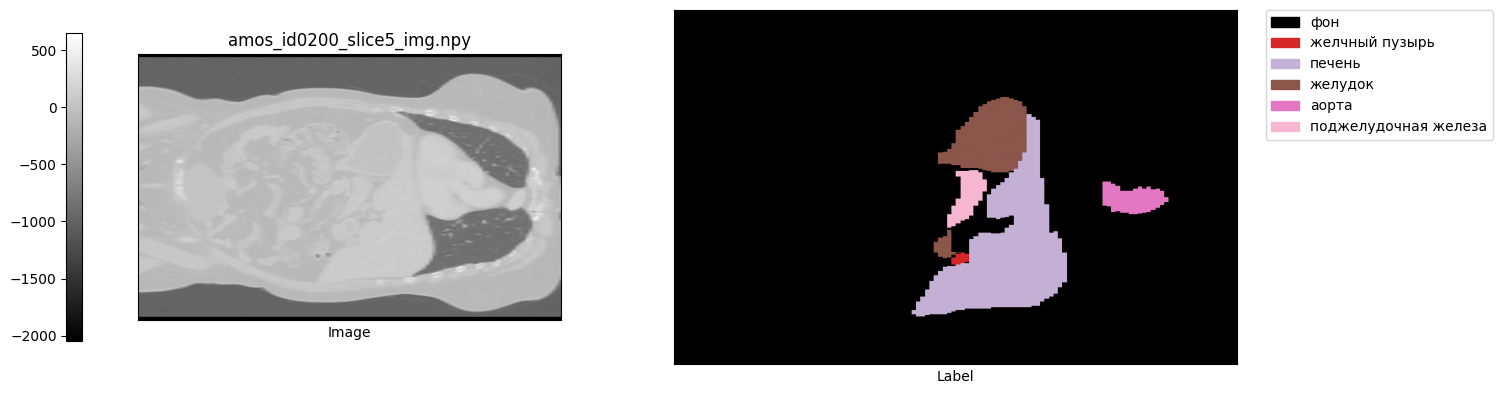

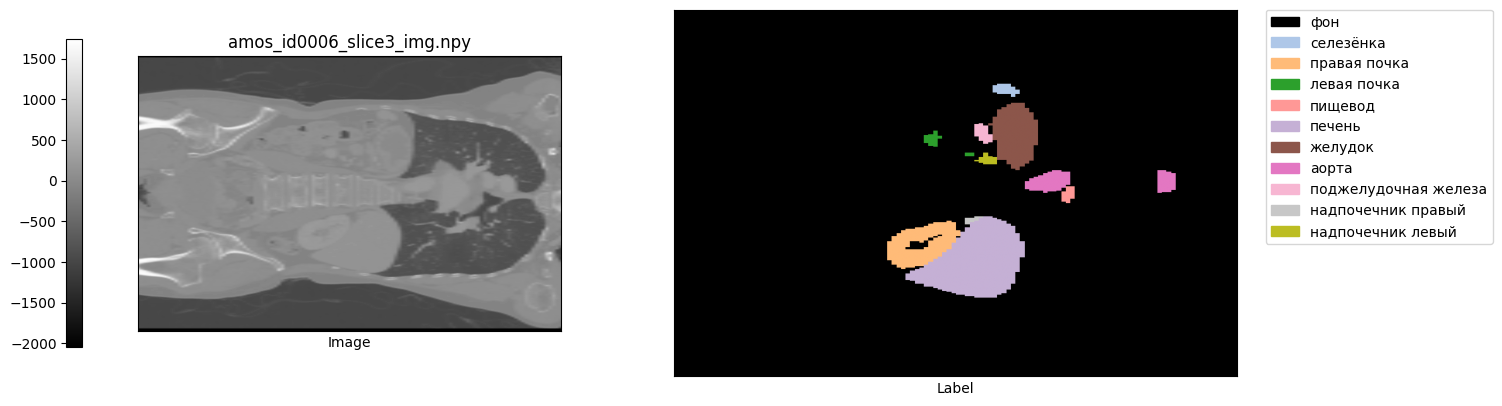

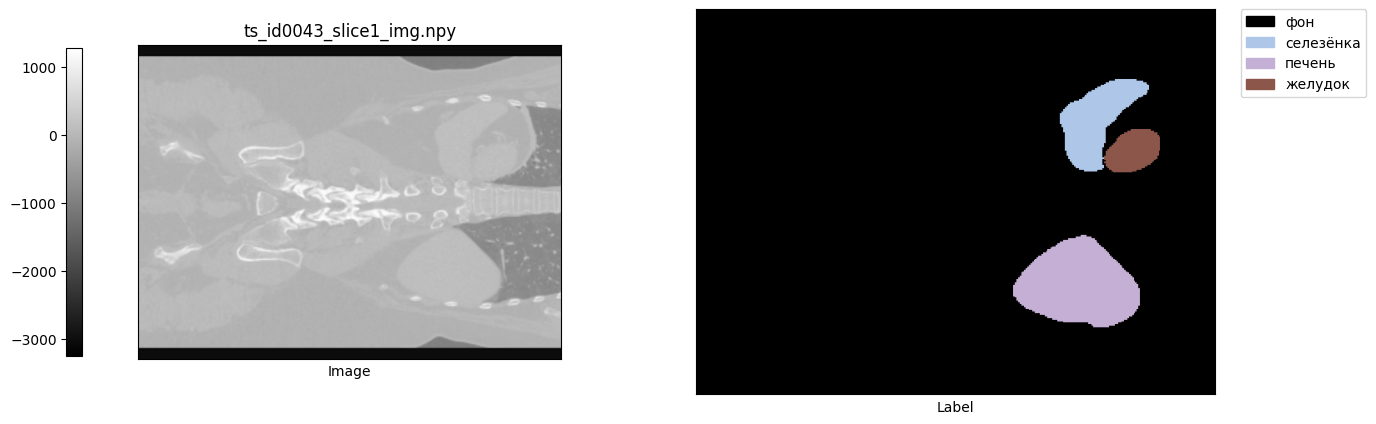

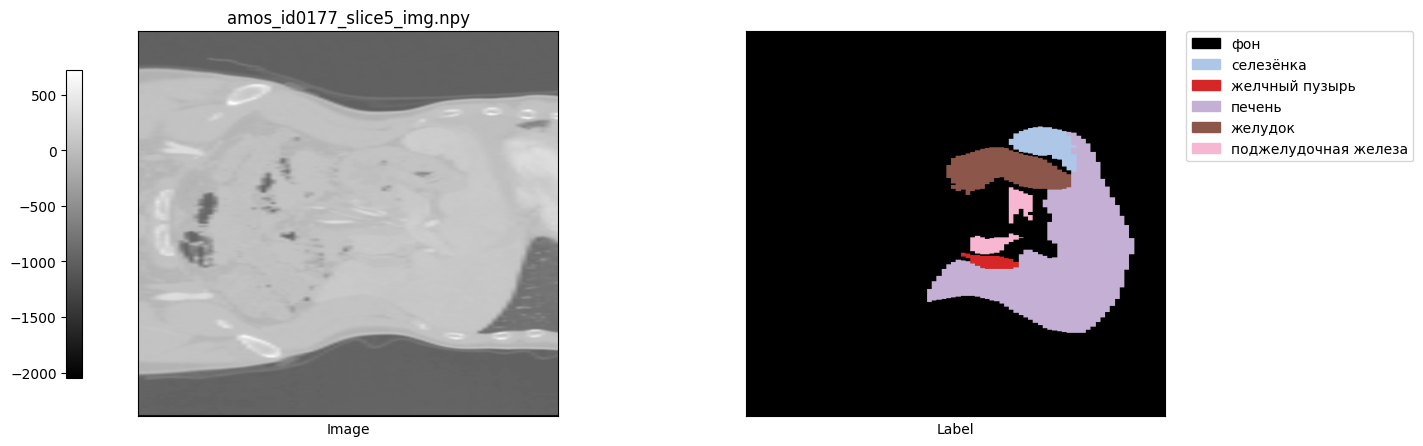

In [2]:
vis_random_batch('../data/default_dataset')

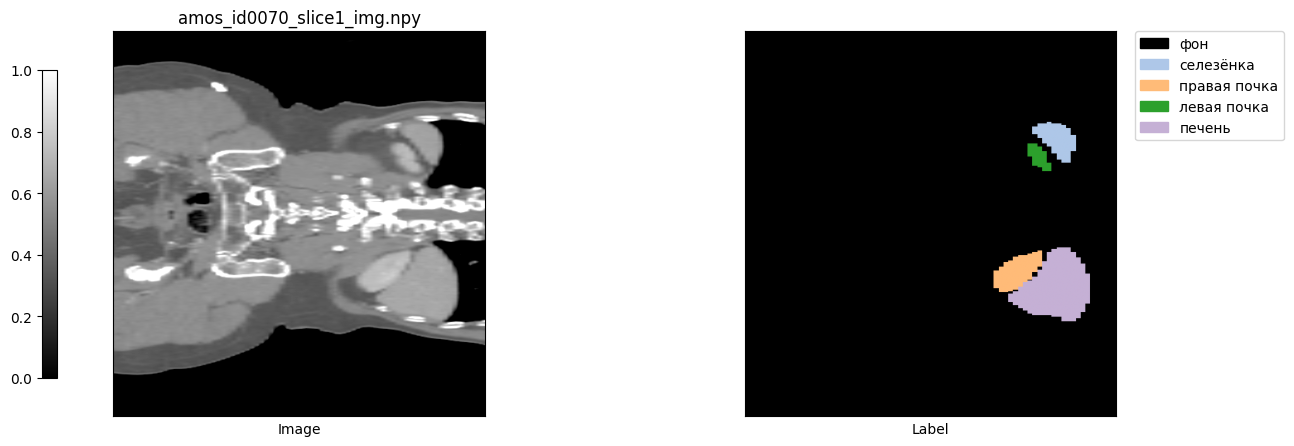

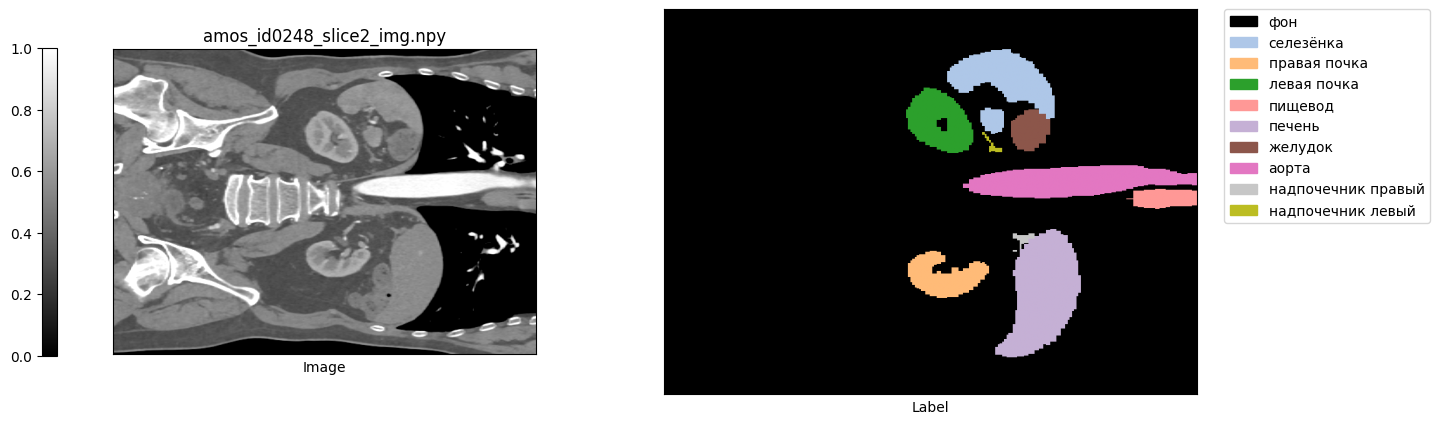

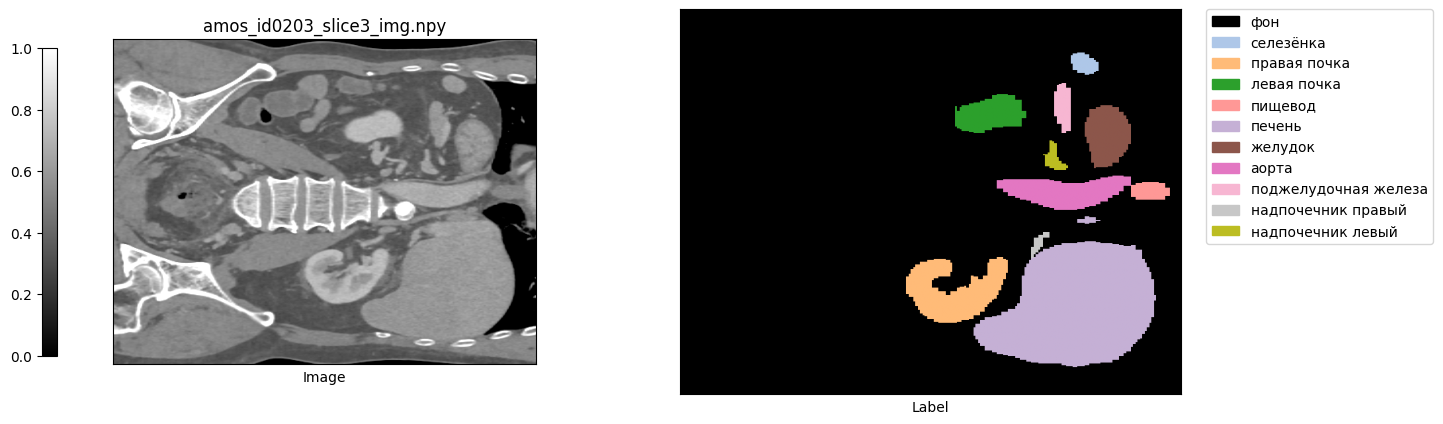

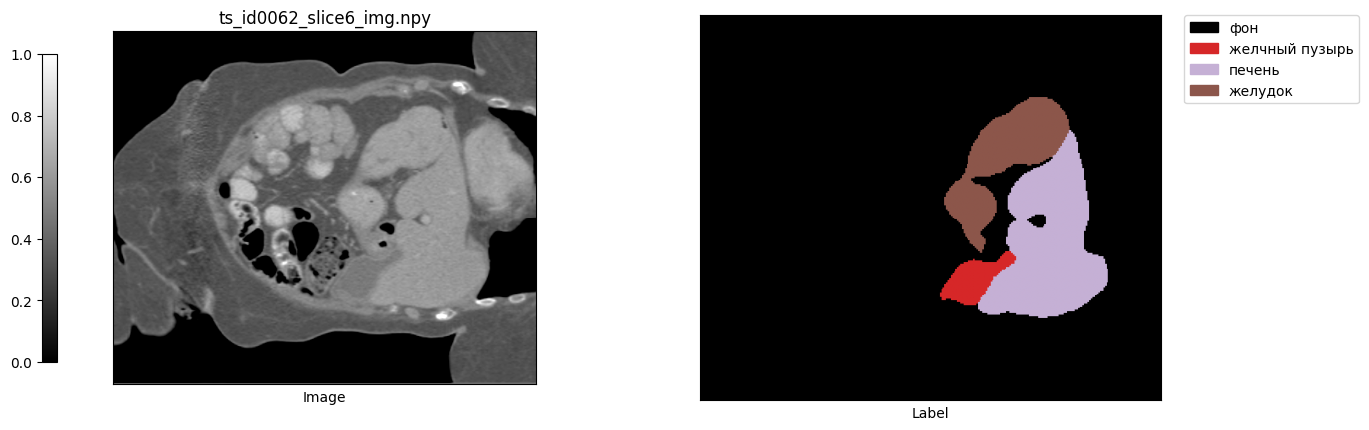

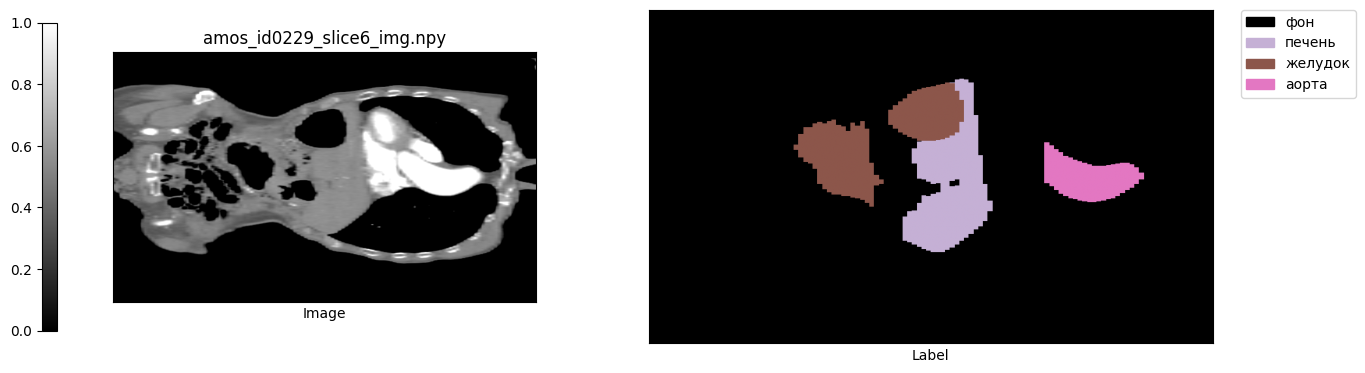

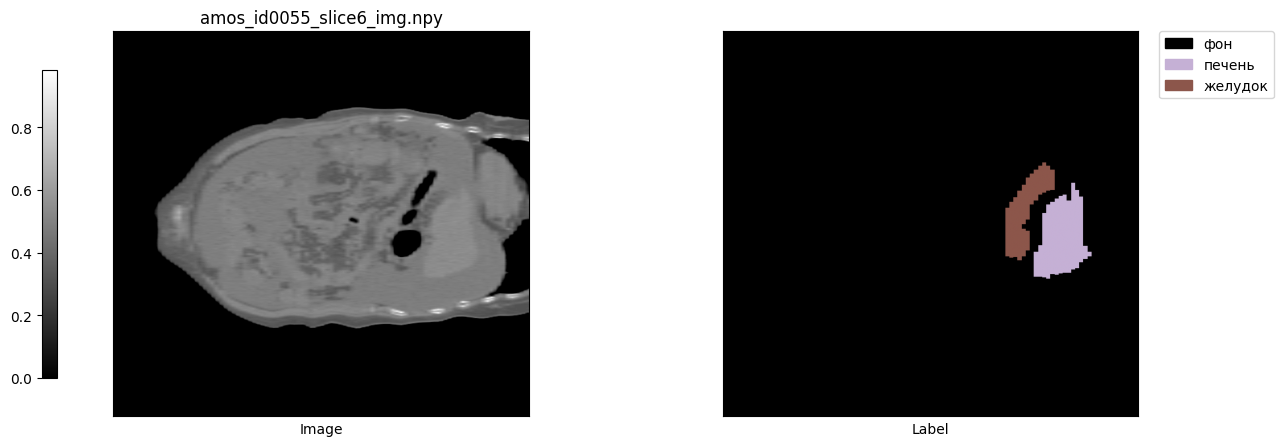

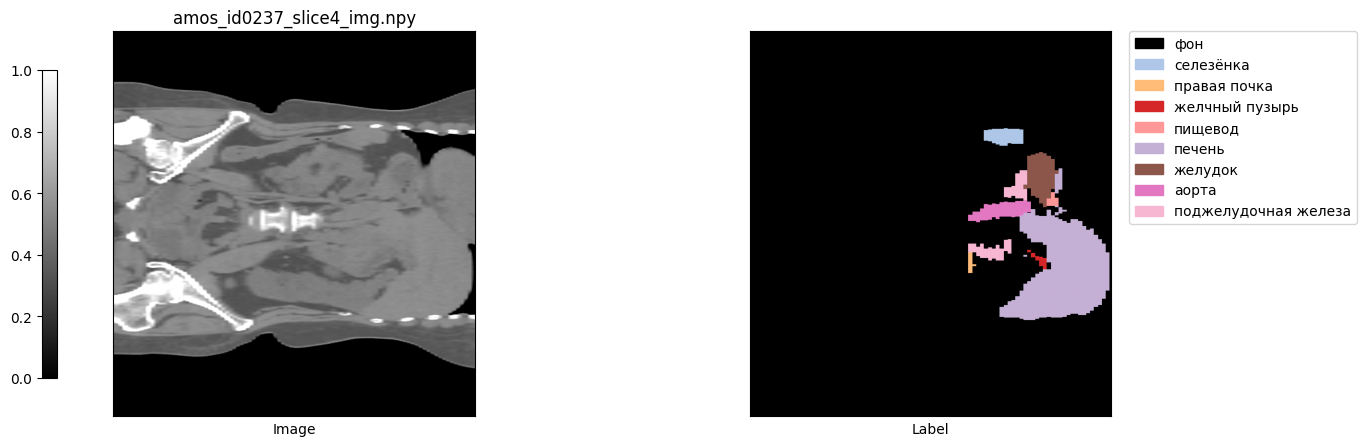

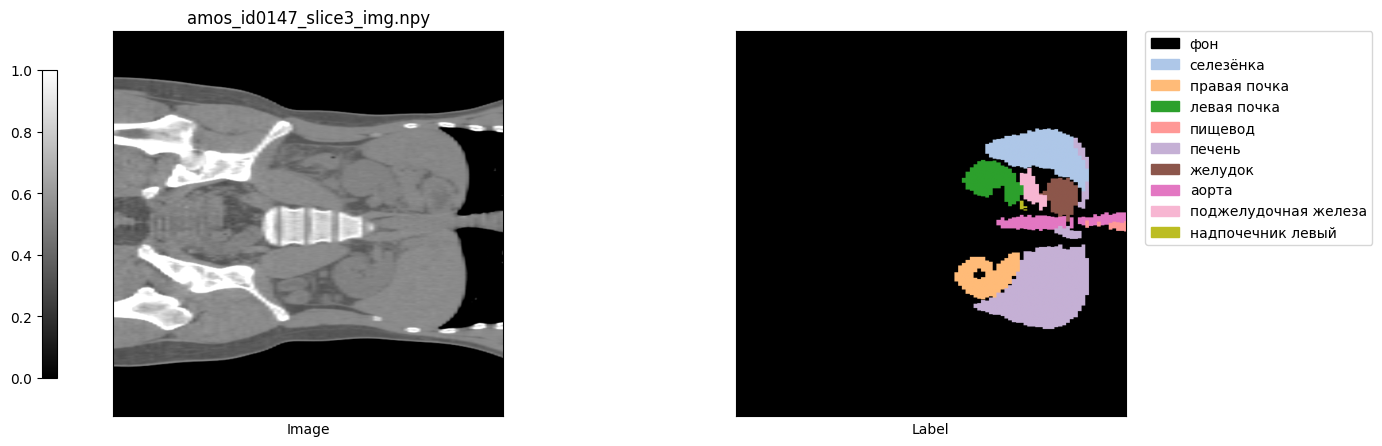

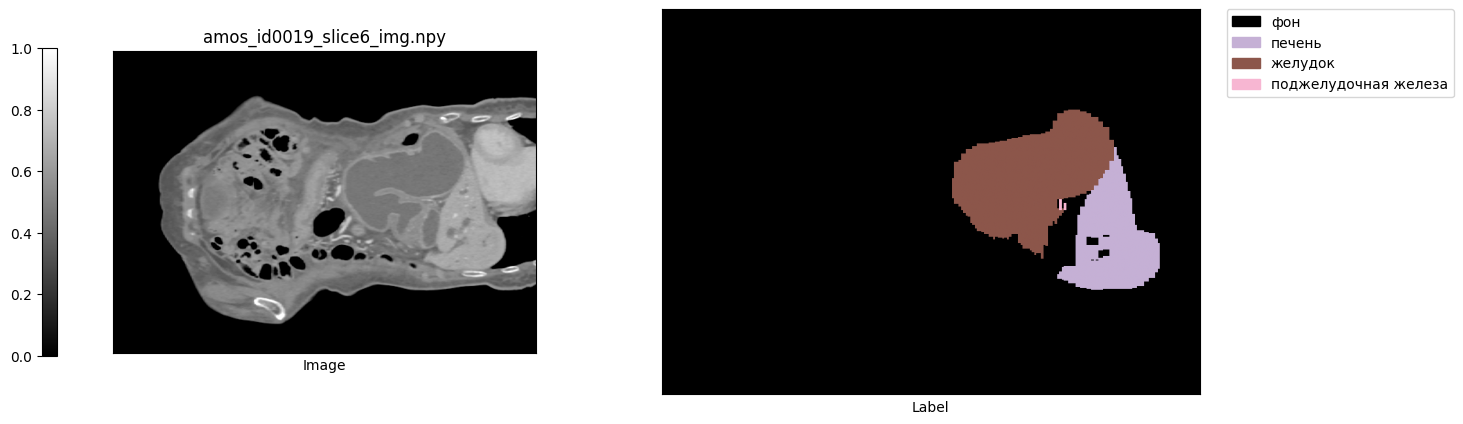

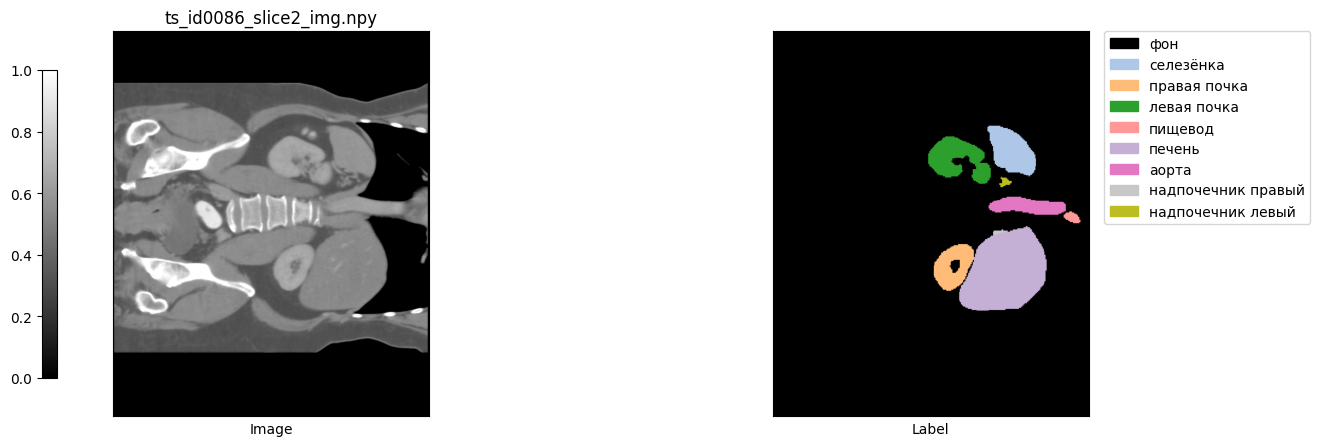

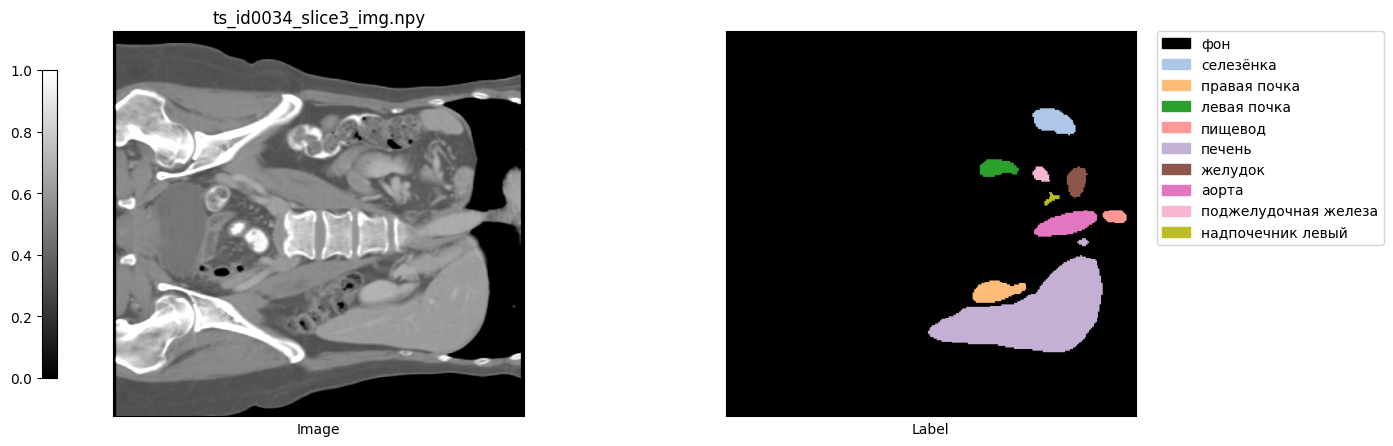

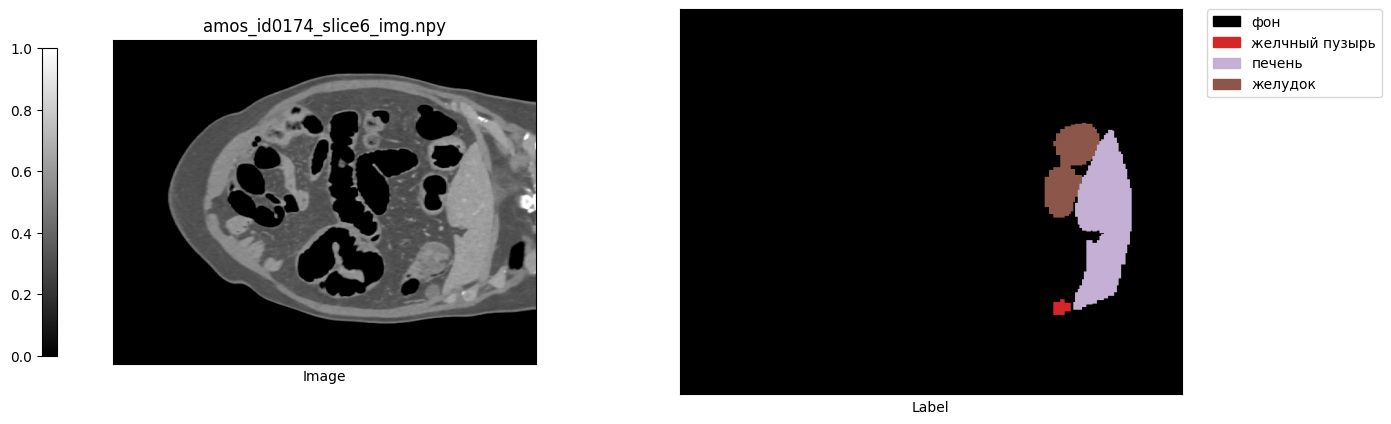

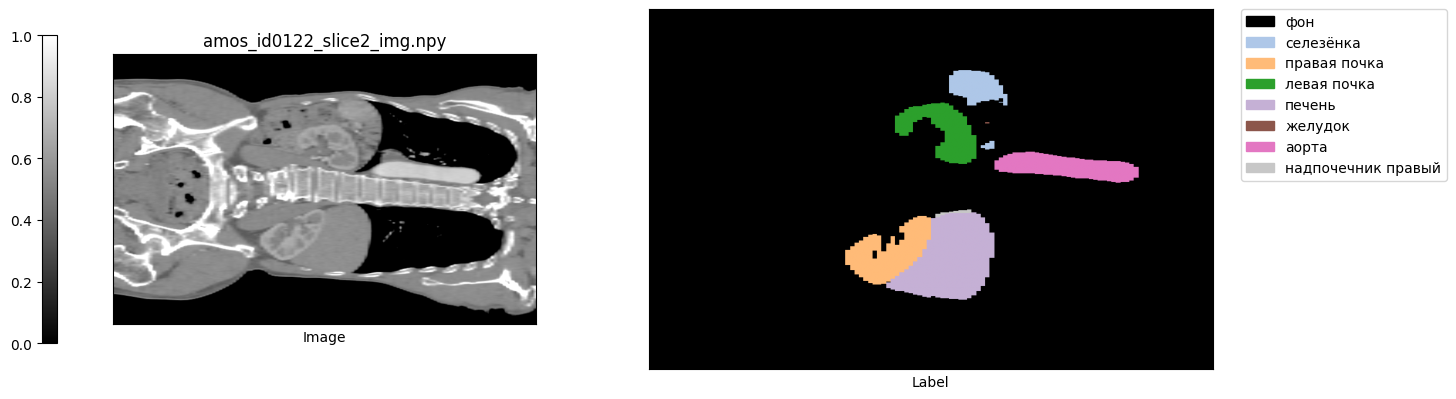

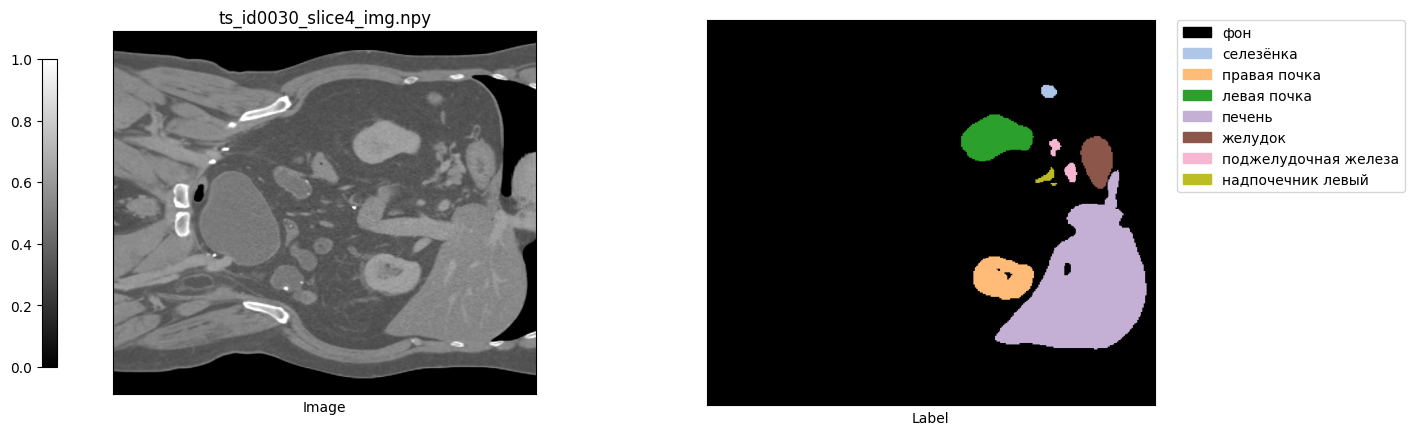

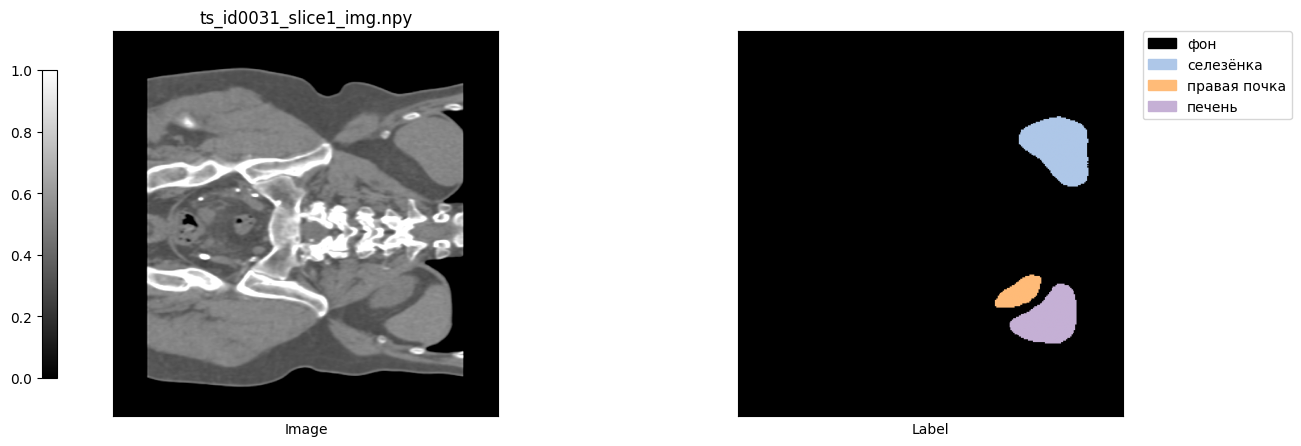

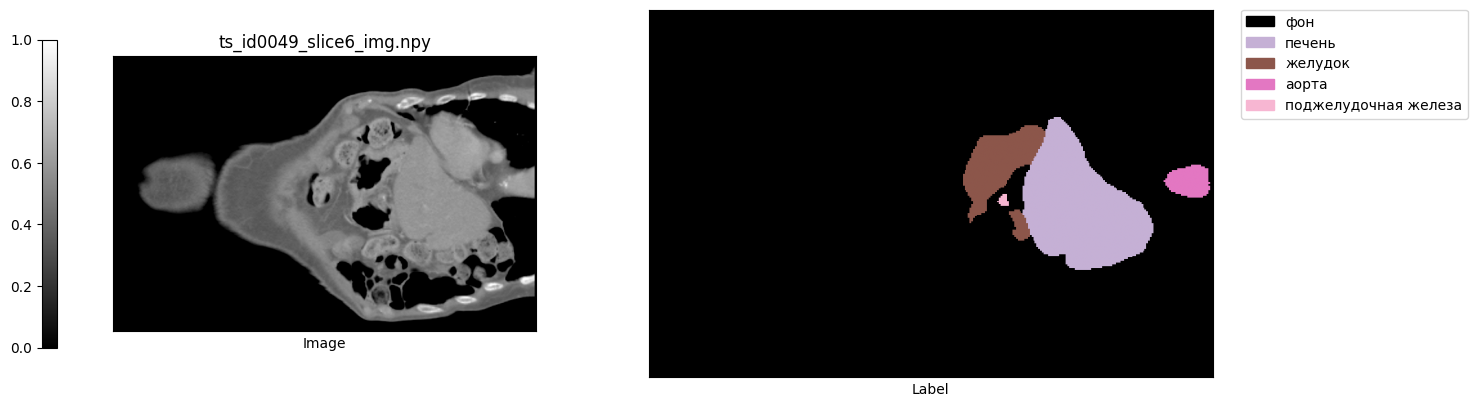

In [3]:
vis_random_batch('../data/default_dataset', 16, True)

### Data analysis

In [4]:
import glob
from tqdm import tqdm

In [5]:
organ_occurrence = {x: 0 for x in labels_dict}
organ_ratio = {x: [] for x in labels_dict}


for file in tqdm(glob.glob('../data/default_dataset/**/*lbl.npy', recursive=True)):
    labels = load_npy(file)
    labels_unique = np.unique(labels)
    total = labels.size
    for label in labels_unique:
        organ_occurrence[label] += 1

        ratio = np.sum(labels == label)/total
        organ_ratio[label].append(ratio)

for label in organ_ratio:
    organ_ratio[label] = np.mean(np.array(organ_ratio[label]))

100%|██████████| 2622/2622 [00:12<00:00, 214.34it/s]
/home/setupishe/segment_ac_organs/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/setupishe/segment_ac_organs/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
organ_occurrence = {x: 0 for x in labels_dict}


for file in tqdm(glob.glob('../data/default_split_by_sample_ids/train/**/*lbl.npy', recursive=True)):
    labels = load_npy(file)
    labels_unique = np.unique(labels)
    total = labels.size
    for label in labels_unique:
        organ_occurrence[label] += 1

100%|██████████| 1830/1830 [00:05<00:00, 316.28it/s]


In [18]:
organ_occurrence.pop(12)

0

In [19]:
weights = [1/organ_occurrence[key] for key in organ_occurrence if key]

In [21]:
weights = np.array(weights)

In [22]:
weights = weights/sum(weights)*len(weights)

In [23]:
loss_weights = np.array([0.64946566, 0.82554302, 0.89841441, 1.40984576, 1.46257621,
       0.41346061, 0.57417984, 0.76047975, 0.85401002, 1.55762833,
       1.59439639])

array([0.64946566, 0.82554302, 0.89841441, 1.40984576, 1.46257621,
       0.41346061, 0.57417984, 0.76047975, 0.85401002, 1.55762833,
       1.59439639])

In [10]:
organ_occurrence

{0: 2622,
 1: 1630,
 2: 1275,
 3: 1194,
 4: 755,
 5: 733,
 6: 2582,
 7: 1858,
 8: 1408,
 9: 1263,
 10: 683,
 11: 663,
 12: 0}

Text(0, 0.5, 'Количество образцов')

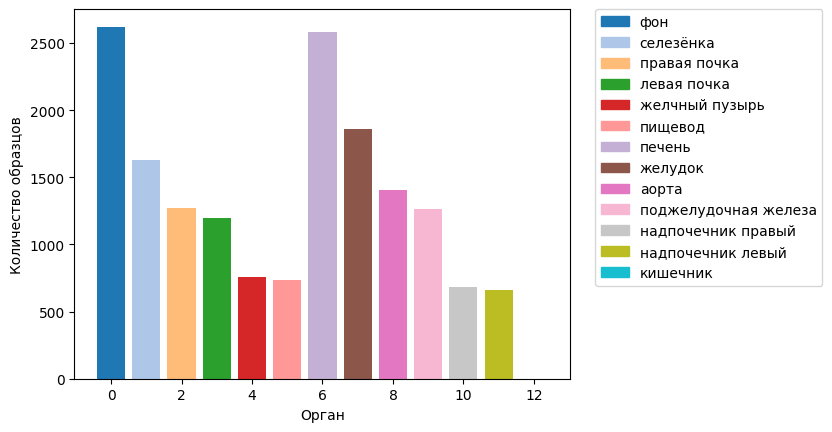

In [6]:
plot_hist_with_legend(organ_occurrence)

plt.xlabel('Орган')
plt.ylabel('Количество образцов')

Text(0.5, 1.0, 'Доля пикселей на изображении')

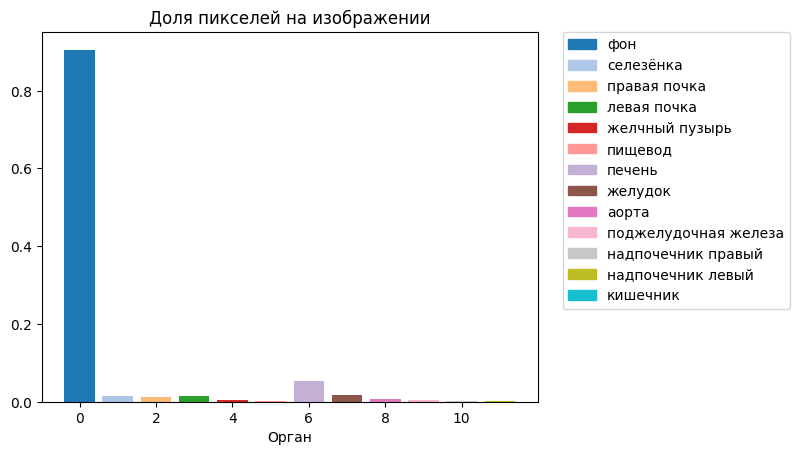

In [7]:
plot_hist_with_legend(organ_ratio)

plt.xlabel('Орган')
plt.title('Доля пикселей на изображении')

In [8]:
organ_ratio.pop(0)

0.9053676536253275

Text(0.5, 1.0, 'Доля пикселей на изображении')

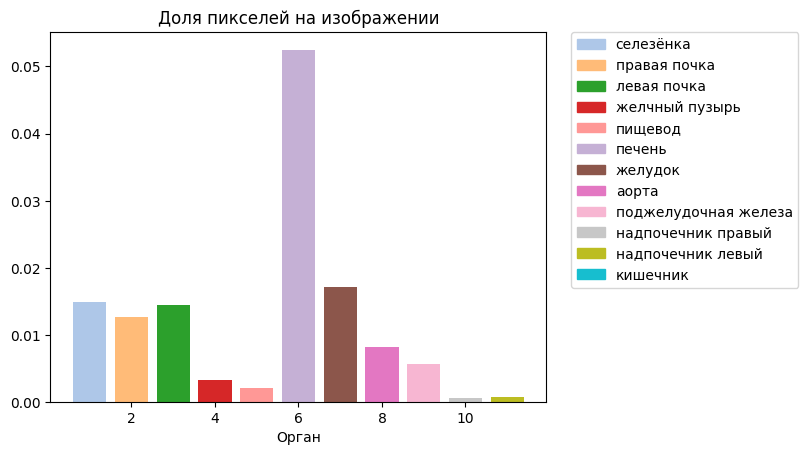

In [9]:
plot_hist_with_legend(organ_ratio)

plt.xlabel('Орган')
plt.title('Доля пикселей на изображении')

### Visualise one slice

In [2]:
sample_names = ["_".join(x.split('_')[:2]) for x in os.listdir('../data/default_dataset/images')]

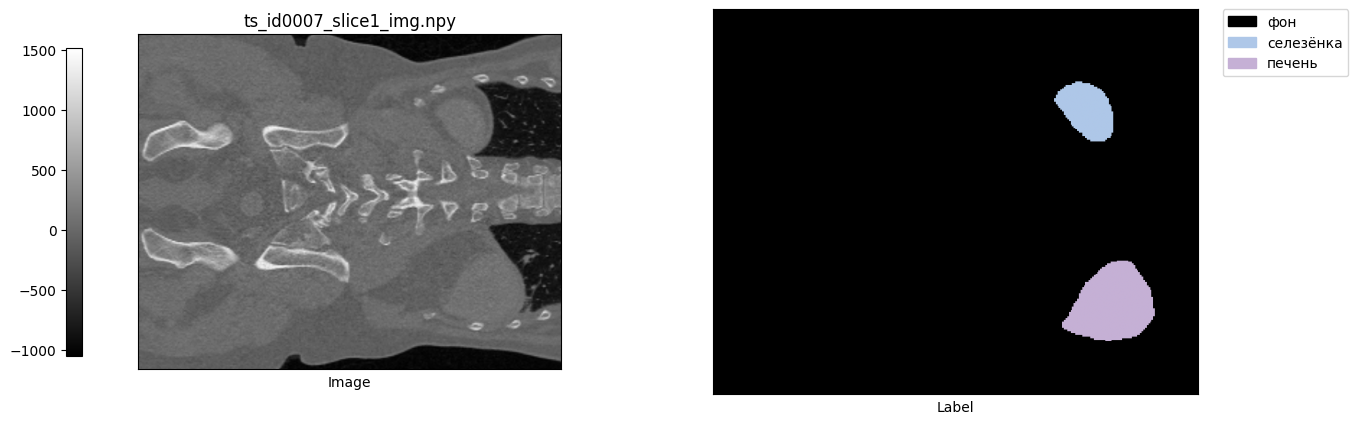

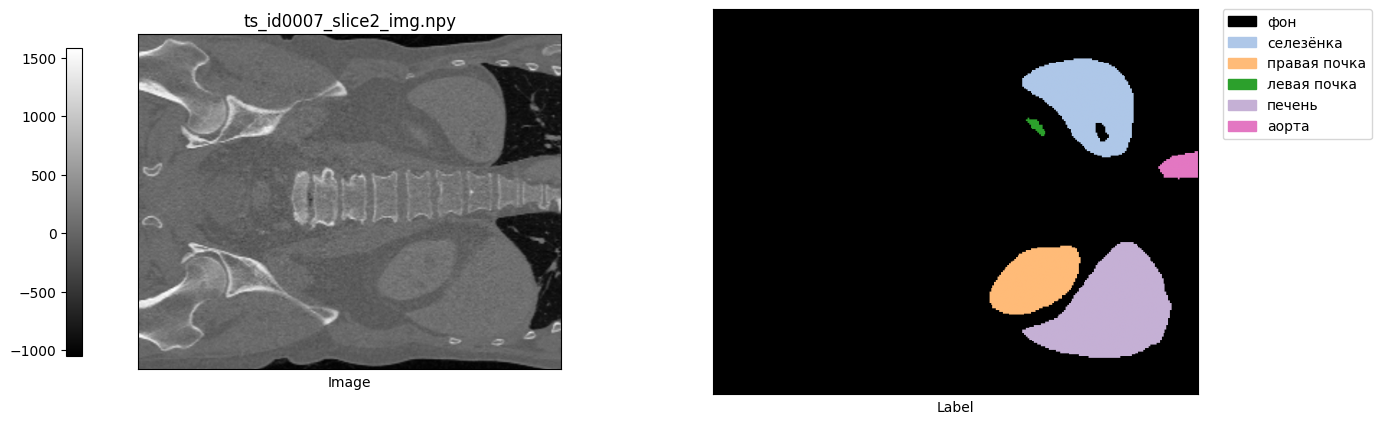

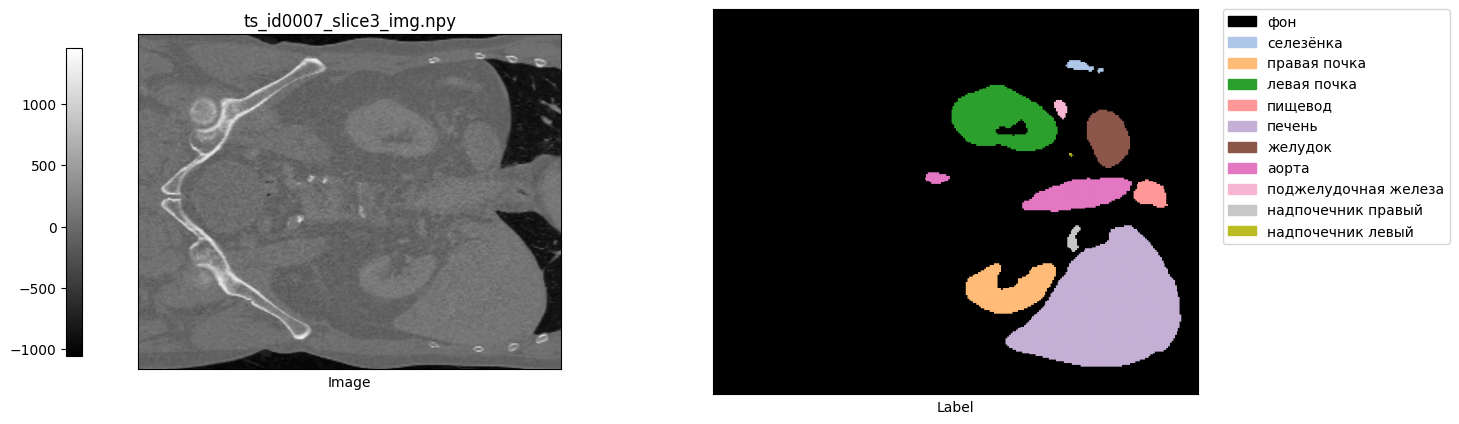

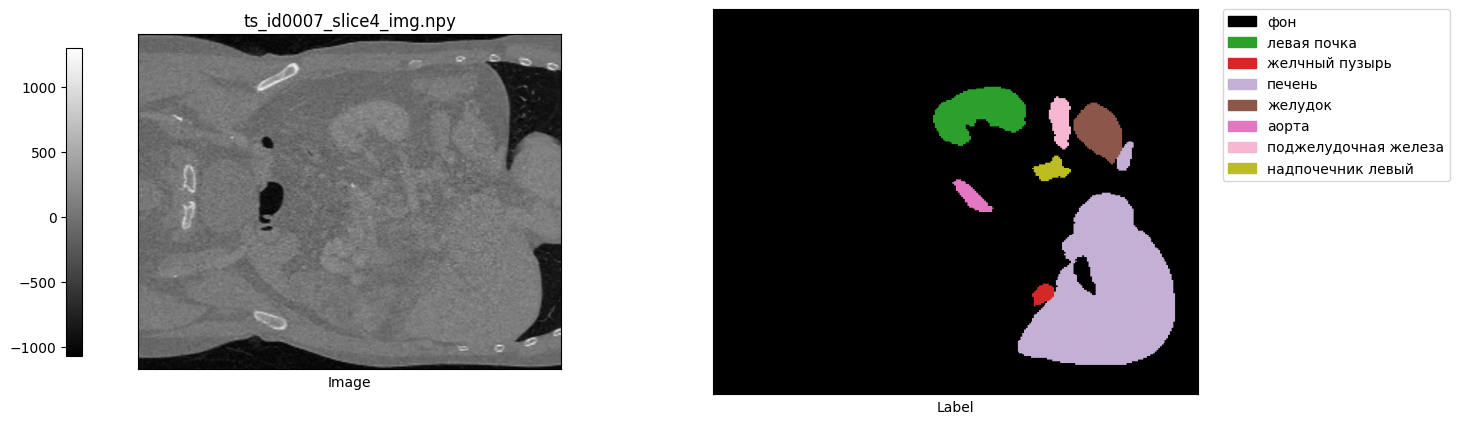

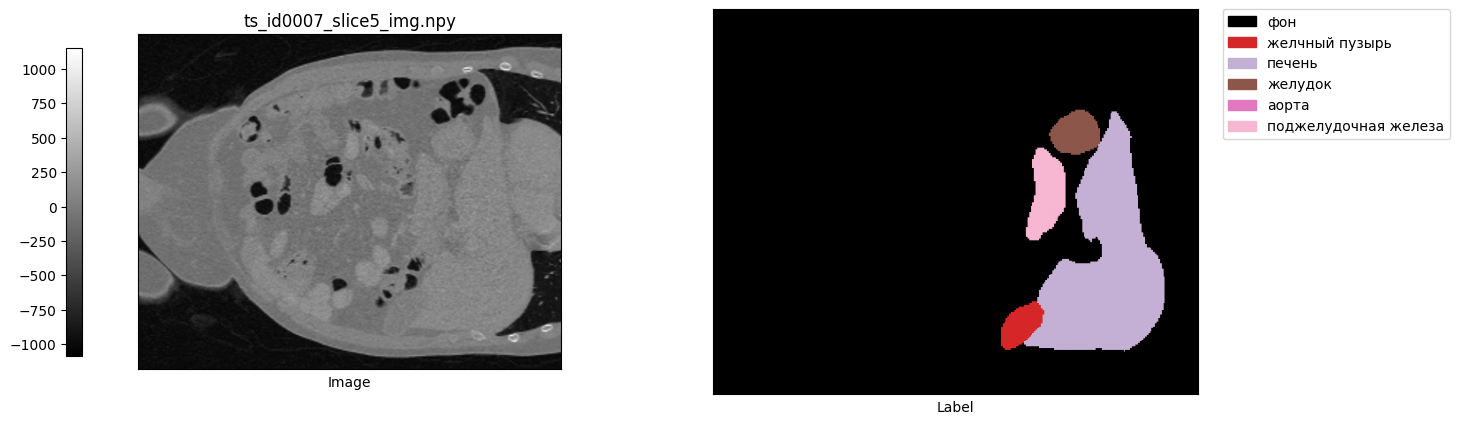

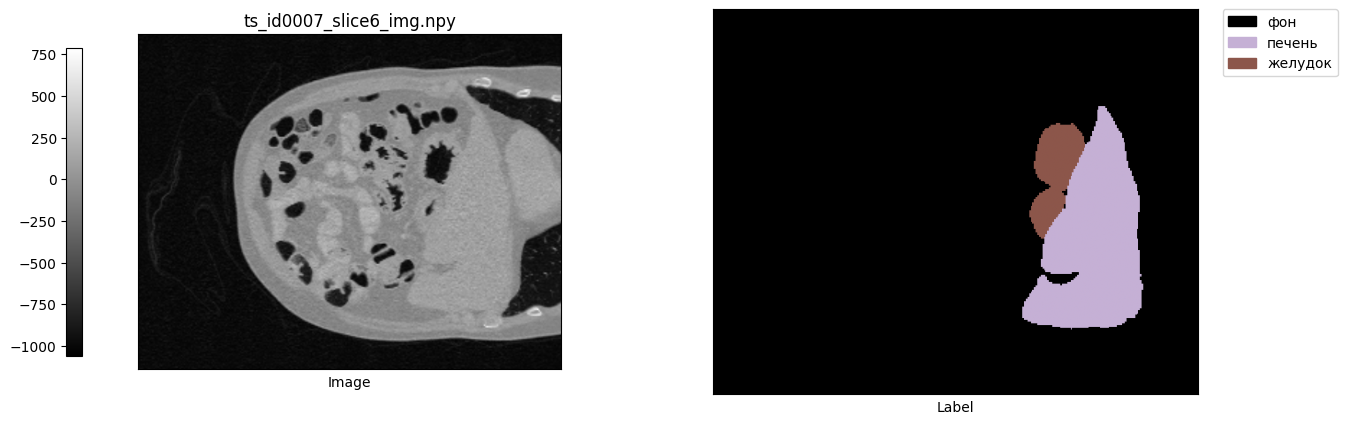

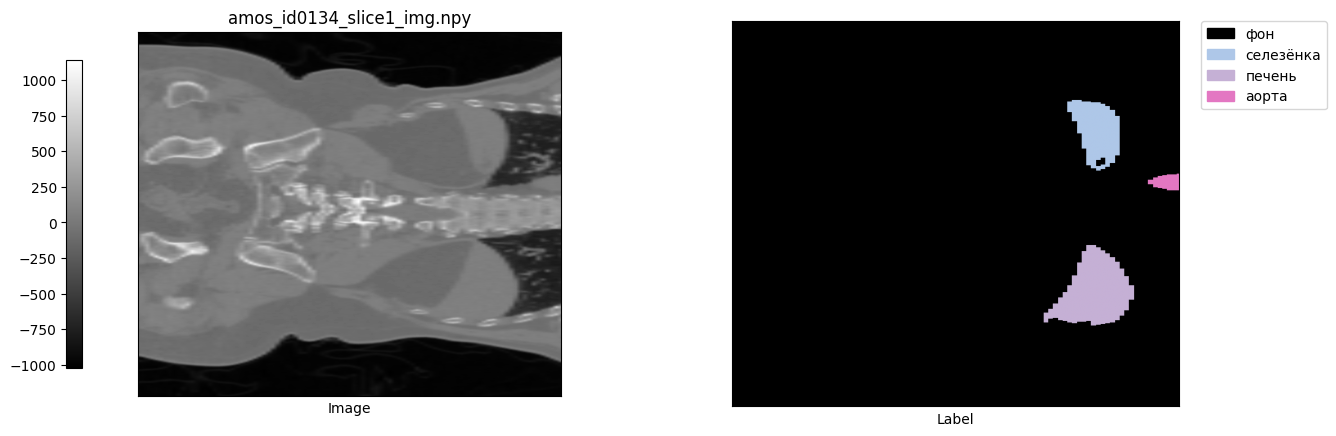

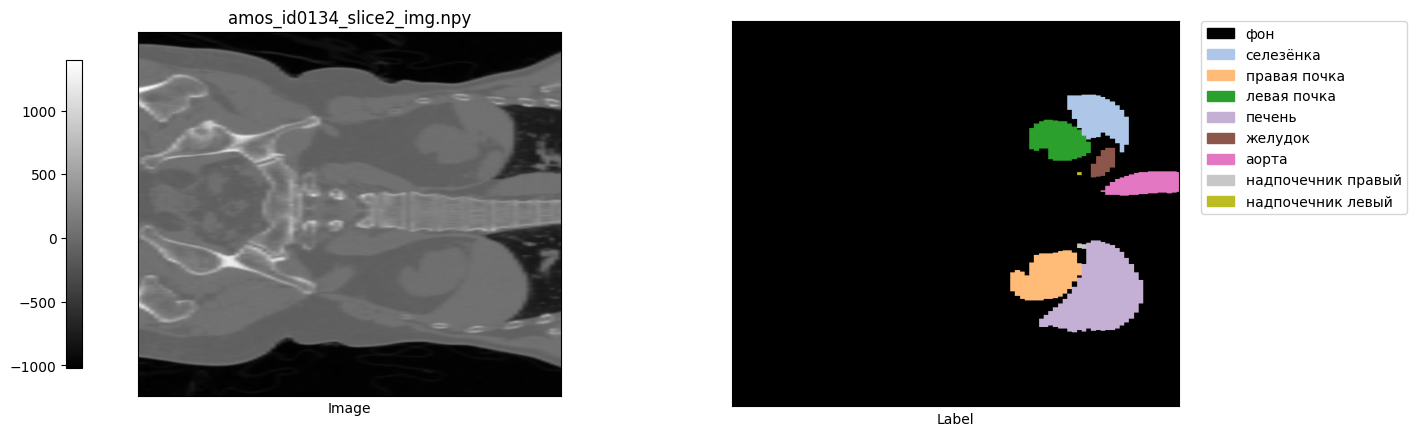

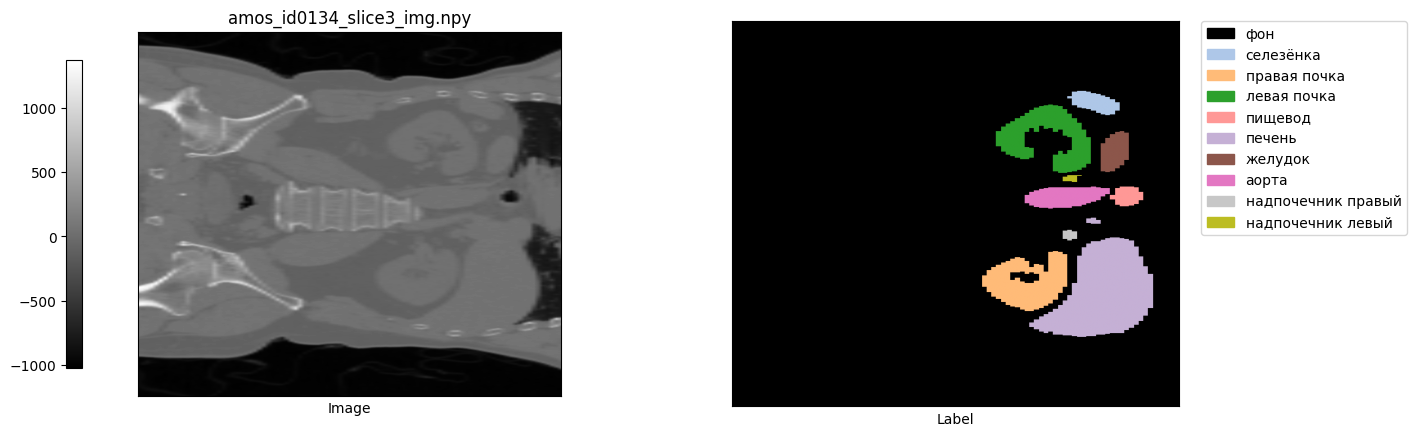

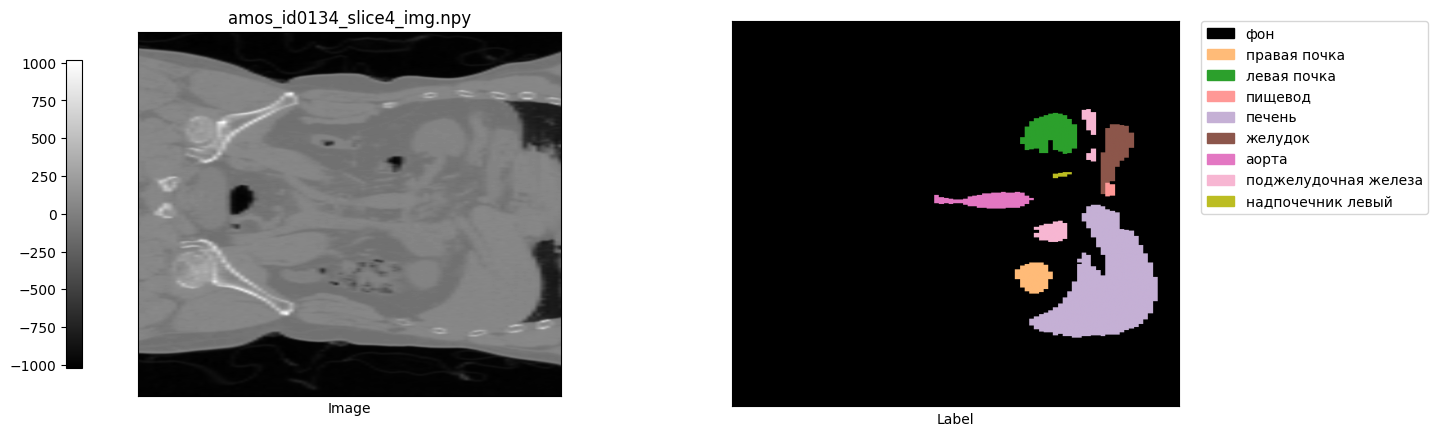

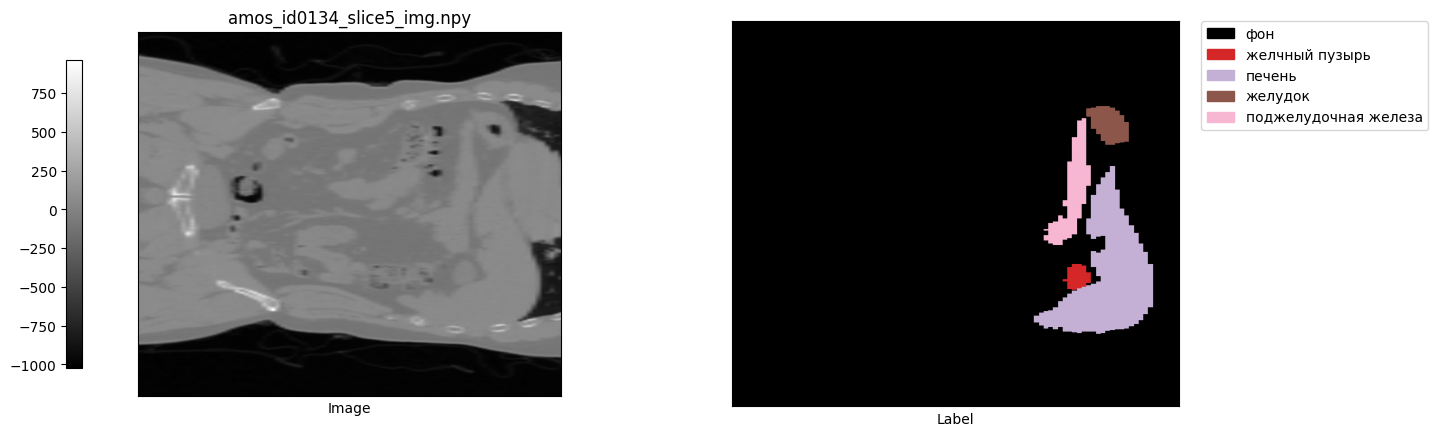

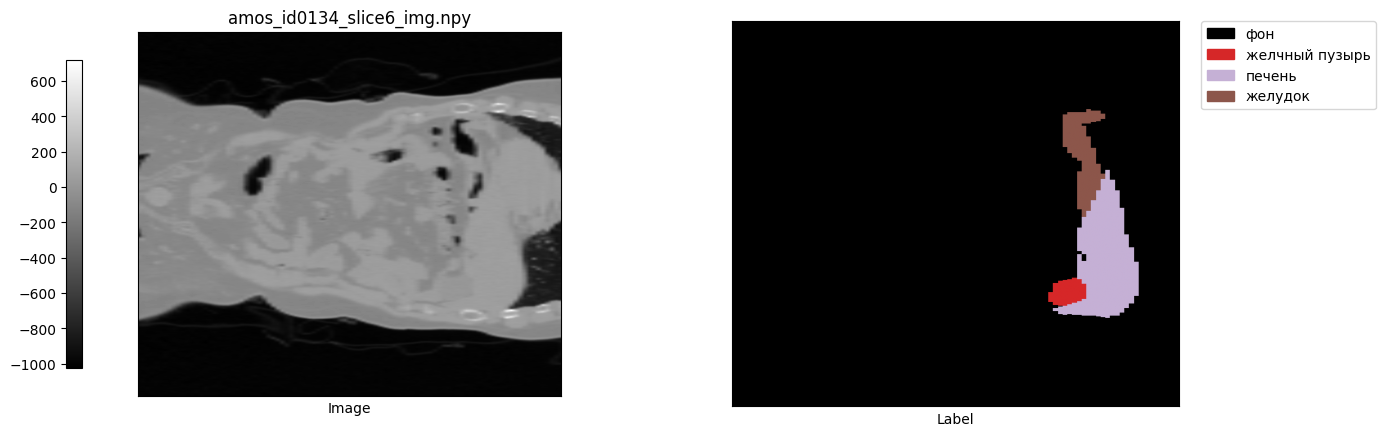

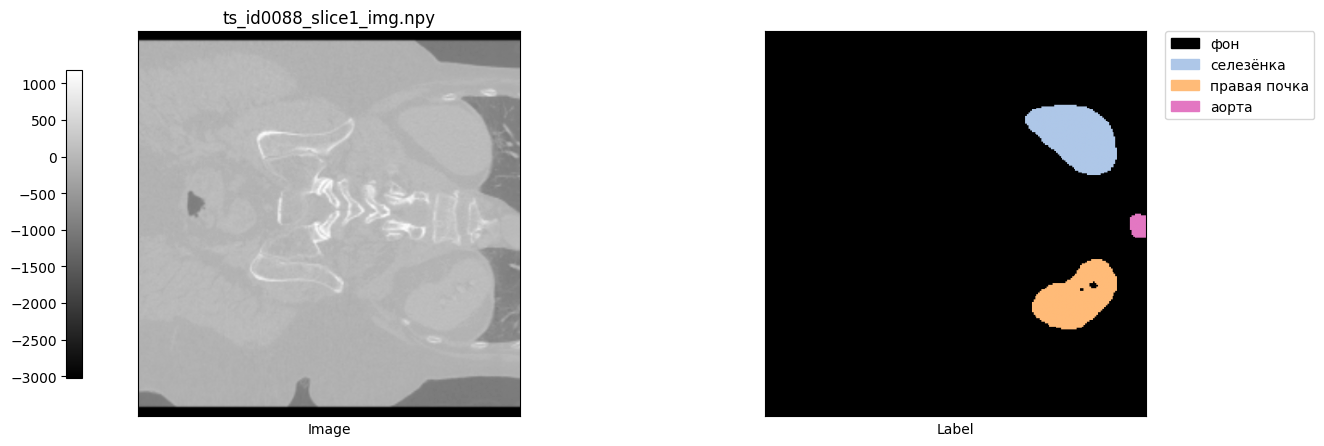

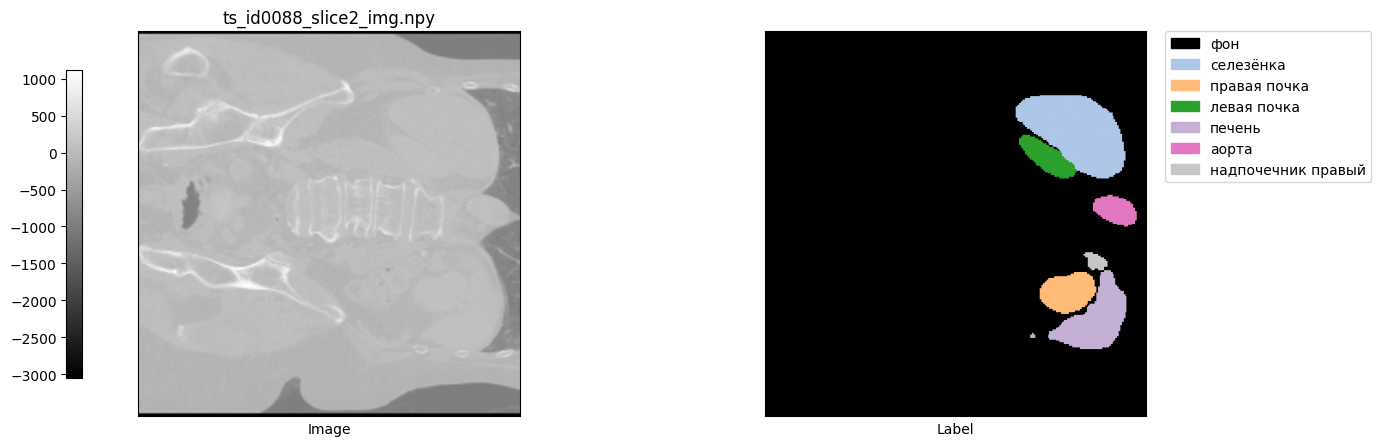

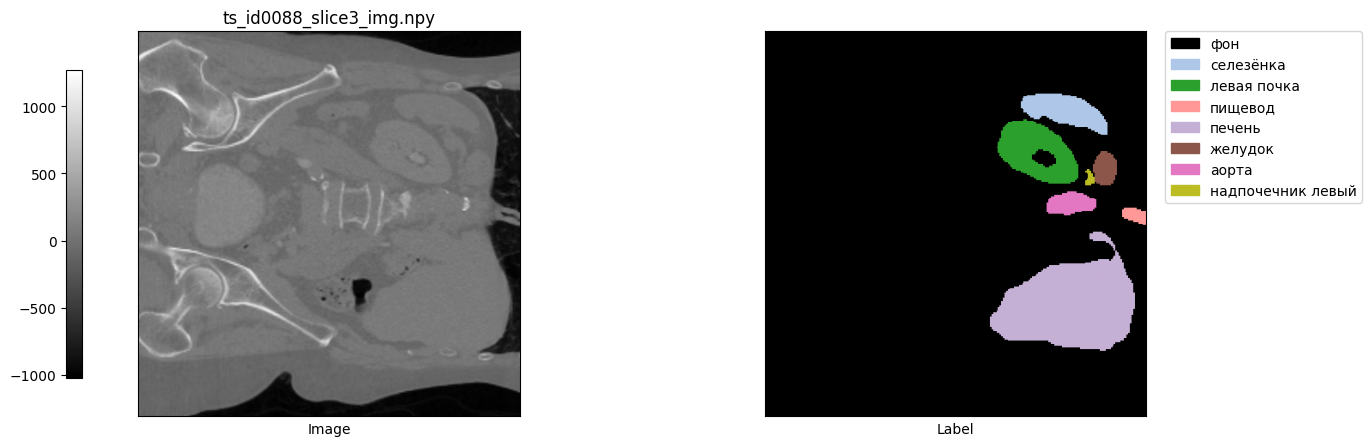

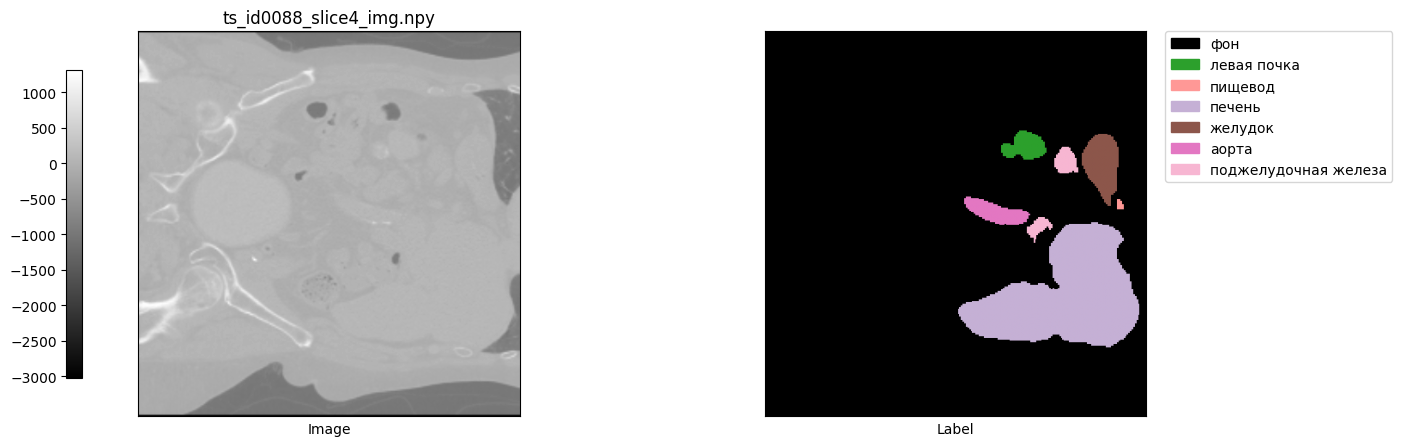

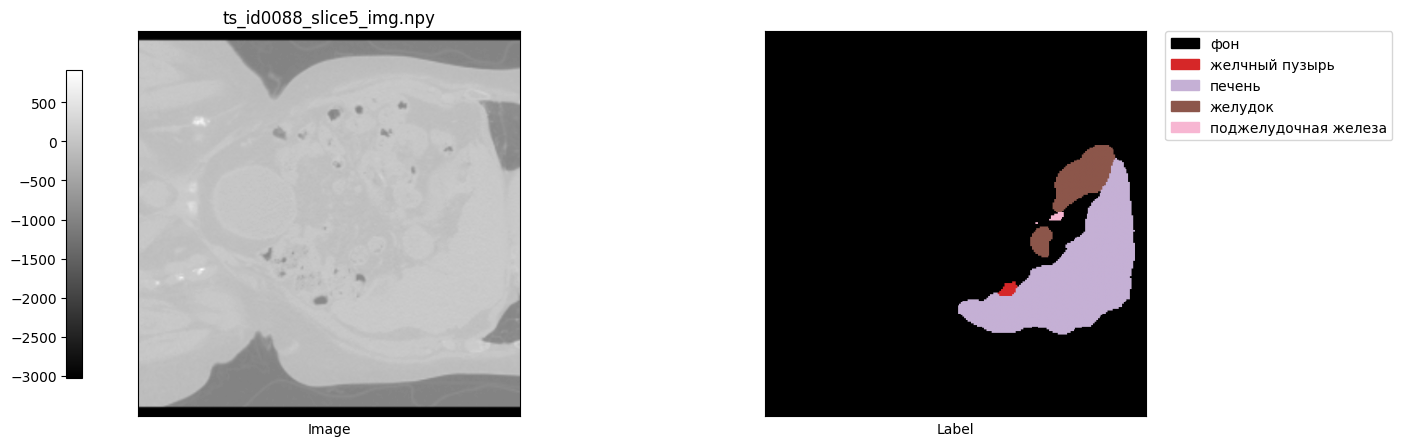

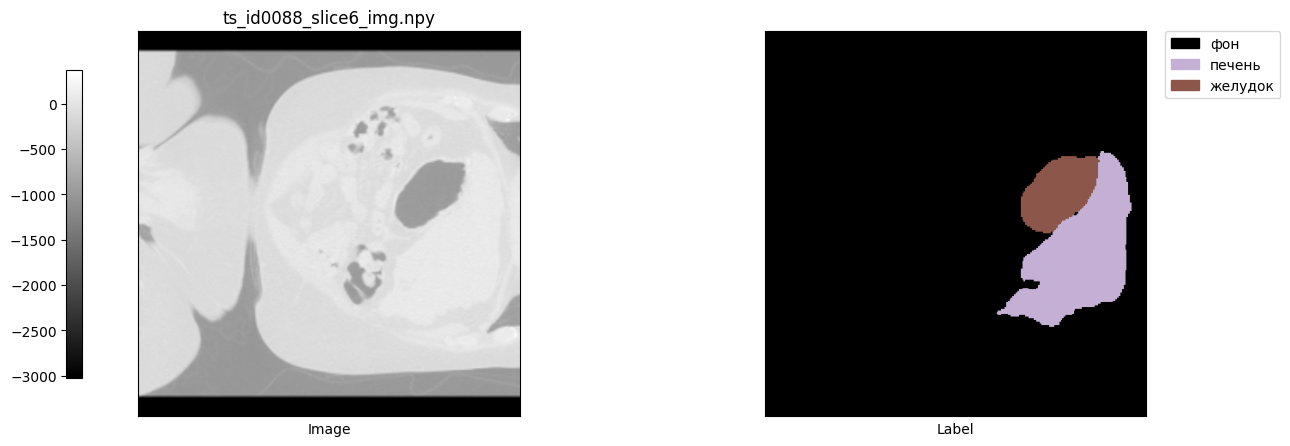

In [4]:
for sample_name in random.sample(sample_names, 3):
    vis_one_slice(sample_name)

### Image shape stats

In [1]:
shapes = []

In [5]:
import glob

In [8]:
for file in glob.glob('../data/default_dataset/**/*img.npy', recursive=True):
    shapes.append(load_npy(file).shape)

In [9]:
len(shapes)

2622

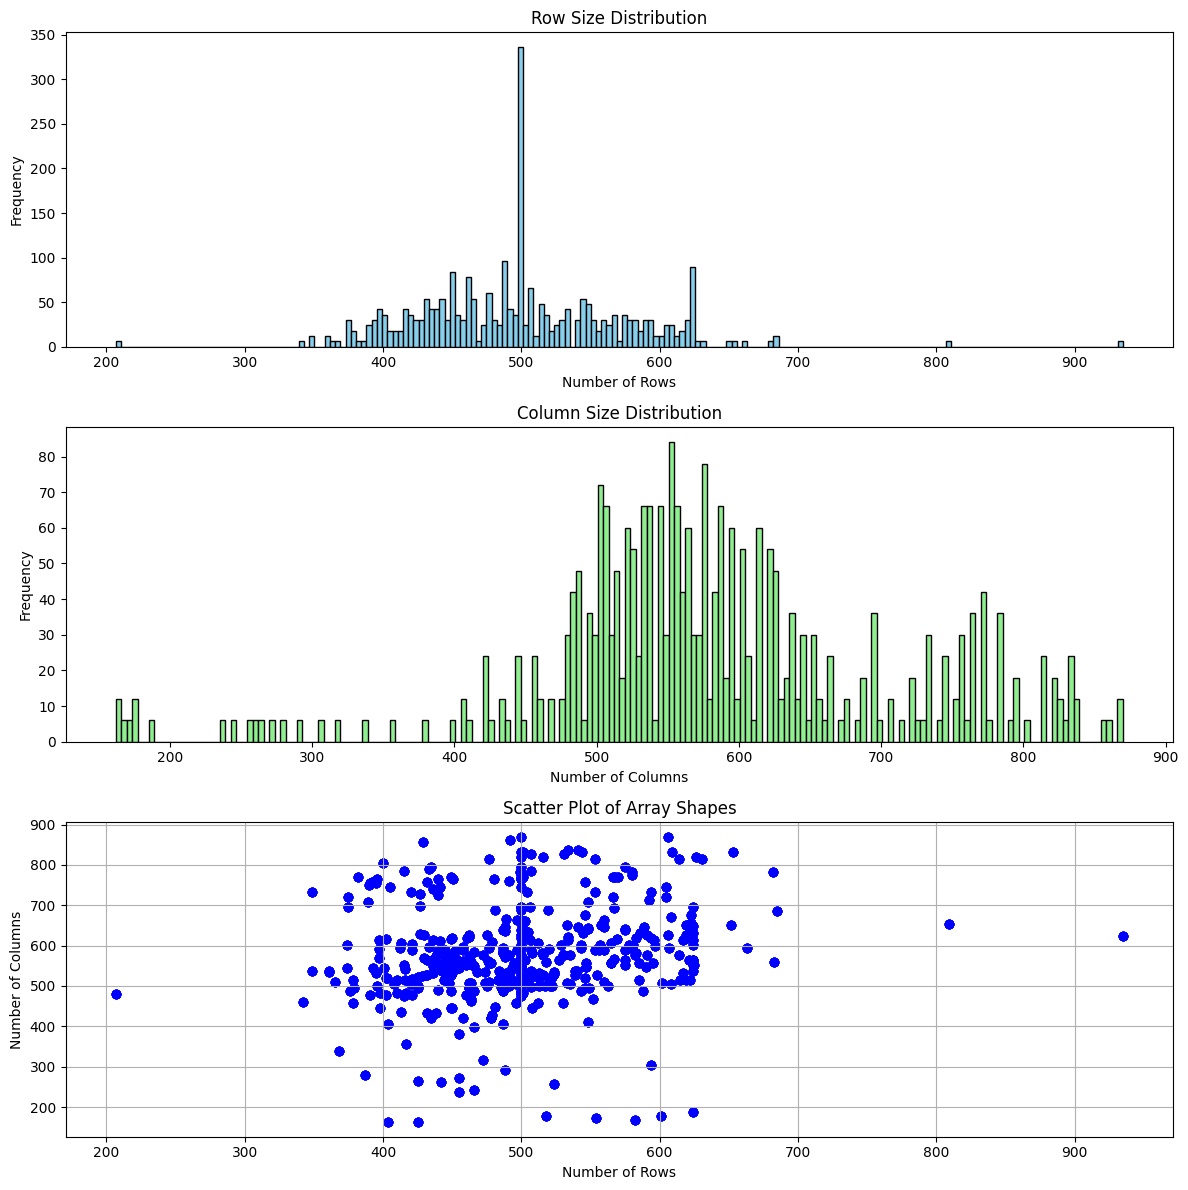

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Aggregate Statistics
rows = [shape[0] for shape in shapes]
cols = [shape[1] for shape in shapes]

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Histogram for Row Sizes
axs[0].hist(rows, bins=len(set(rows)), color='skyblue', edgecolor='black')
axs[0].set_title('Row Size Distribution')
axs[0].set_xlabel('Number of Rows')
axs[0].set_ylabel('Frequency')

# Histogram for Column Sizes
axs[1].hist(cols, bins=len(set(cols)), color='lightgreen', edgecolor='black')
axs[1].set_title('Column Size Distribution')
axs[1].set_xlabel('Number of Columns')
axs[1].set_ylabel('Frequency')

# Scatter Plot of Shapes
axs[2].scatter(rows, cols, color='blue')
axs[2].set_title('Scatter Plot of Array Shapes')
axs[2].set_xlabel('Number of Rows')
axs[2].set_ylabel('Number of Columns')
axs[2].grid(True)


plt.tight_layout()
plt.show()


In [3]:
from tqdm import tqdm
import glob

### Image values stats

In [2]:
labels_minmax = {label: {"min": 0, "max": 0} for label in labels_dict}


In [4]:
for file in tqdm(glob.glob('../data/default_dataset/**/*img.npy', recursive=True)):
    image = load_npy(file)
    labels = load_npy(img2label(file))
    for label in np.unique(labels):
        indices = np.where(labels == label)
        values = image[indices]
        label_dict = labels_minmax[label]
        label_dict['min'] = min(np.min(values), label_dict['min'])
        label_dict['max'] = max(np.max(values), label_dict['max'])


  0%|          | 0/2622 [00:00<?, ?it/s]

100%|██████████| 2622/2622 [00:22<00:00, 116.57it/s]


In [5]:
labels_bins = {}
for label in labels_dict:
    min_val = labels_minmax[label]['min']
    max_val = labels_minmax[label]['max']

    labels_bins[label] = np.linspace(min_val, max_val, int((max_val-min_val)/100))

In [6]:
labels_hists = {label: np.zeros_like(labels_bins[label][:-1]) for label in labels_dict}
for file in tqdm(glob.glob('../data/default_dataset/**/*img.npy', recursive=True)):
    image = load_npy(file)
    labels = load_npy(img2label(file))
    for label in np.unique(labels):
        bins = labels_bins[label]
        indices = np.where(labels == label)
        values = image[indices]
        hist, _ = np.histogram(values, bins=bins)
        labels_hists[label] += hist

100%|██████████| 2622/2622 [00:46<00:00, 56.48it/s]


In [10]:
label_dict

{'min': -662.21545, 'max': 1462.4772}

In [ ]:
USED_CLASSES = [0, 1, 2, 3, 6, 7, 8, 9]

In [11]:
for label in labels_dict:
    if label == 0 or label not in USED_CLASSES:
        labels_hists.pop(label)
        labels_bins.pop(label)

In [15]:
import numpy as np

# Assuming labels_hists contains histogram counts and labels_bins contains bin edges
clipping_limits = {}
for label, hist in labels_hists.items():
    if np.sum(hist) > 0:  # Ensure histogram is not empty
        bins = labels_bins[label]
        # Ensure there are enough bins to calculate bin centers
        if len(bins) > 1:
            bin_centers = (bins[:-1] + bins[1:]) / 2
            cdf = np.cumsum(hist) / np.sum(hist)  # Calculate the CDF from the histogram
            
            lower_limit_idx = np.searchsorted(cdf, 0.07)  # 1st percentile
            upper_limit_idx = np.searchsorted(cdf, 0.93)  # 99th percentile
            
            # Ensure indices are within the range of bin_centers
            lower_limit_idx = max(lower_limit_idx-1, 0)
            upper_limit_idx = min(upper_limit_idx, len(bin_centers)-1)
            
            # Get the corresponding bin values, with additional checks for empty arrays
            lower_limit = bin_centers[lower_limit_idx] if len(bin_centers) > lower_limit_idx else None
            upper_limit = bin_centers[upper_limit_idx] if len(bin_centers) > upper_limit_idx else None
            
            if lower_limit is not None and upper_limit is not None:
                clipping_limits[label] = (lower_limit, upper_limit)

# Assuming all classes have valid clipping limits
if clipping_limits:
    global_min = min(limit[0] for limit in clipping_limits.values() if limit is not None)
    global_max = max(limit[1] for limit in clipping_limits.values() if limit is not None)
    print(f"Global clipping limits: {global_min}, {global_max}")
else:
    print("No valid clipping limits found.")


Global clipping limits: -777.1206314086915, 393.13803405761723


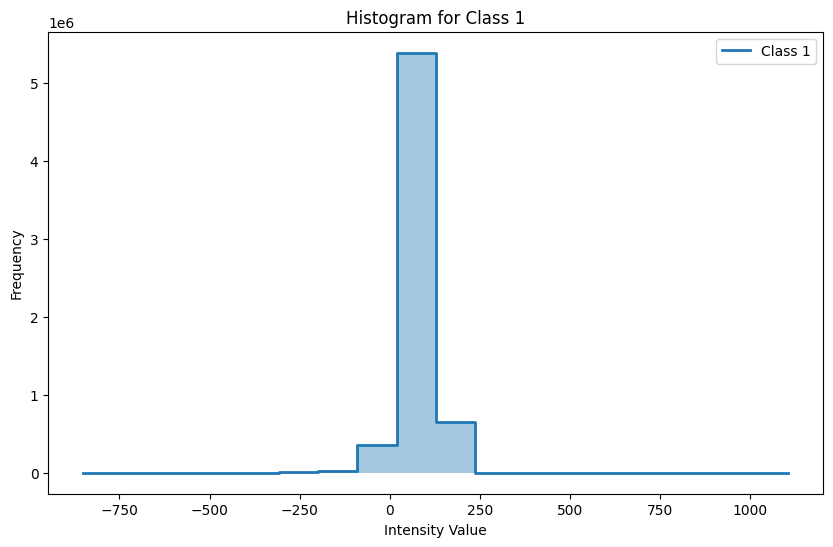

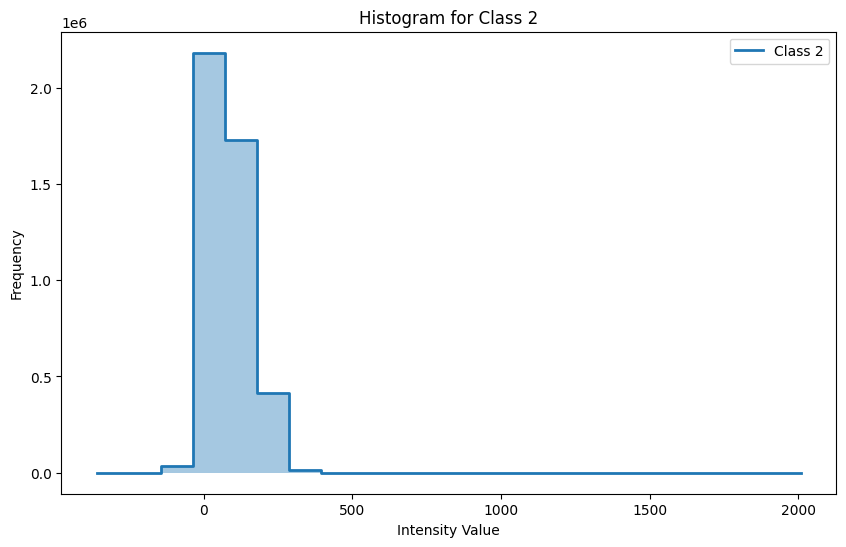

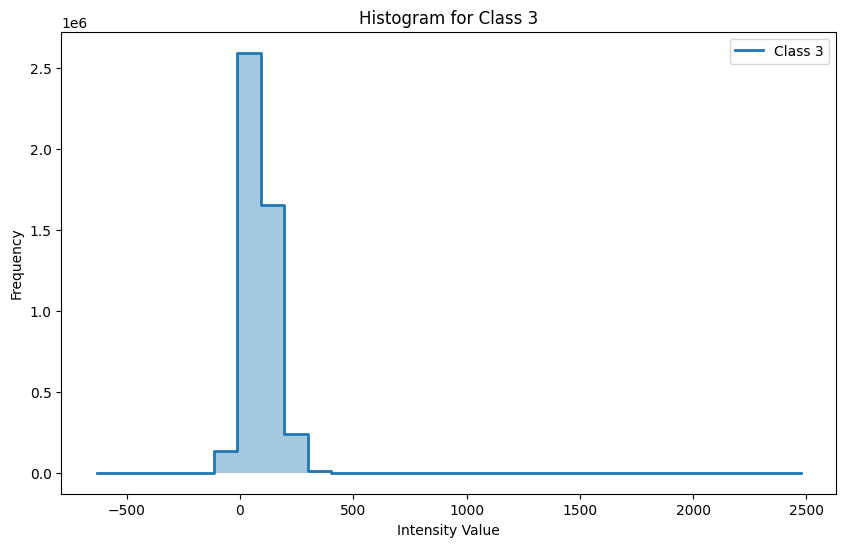

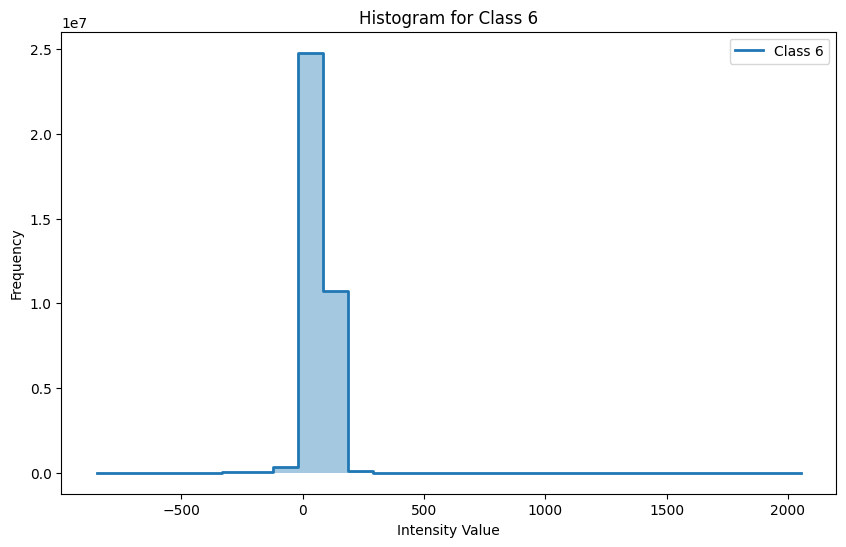

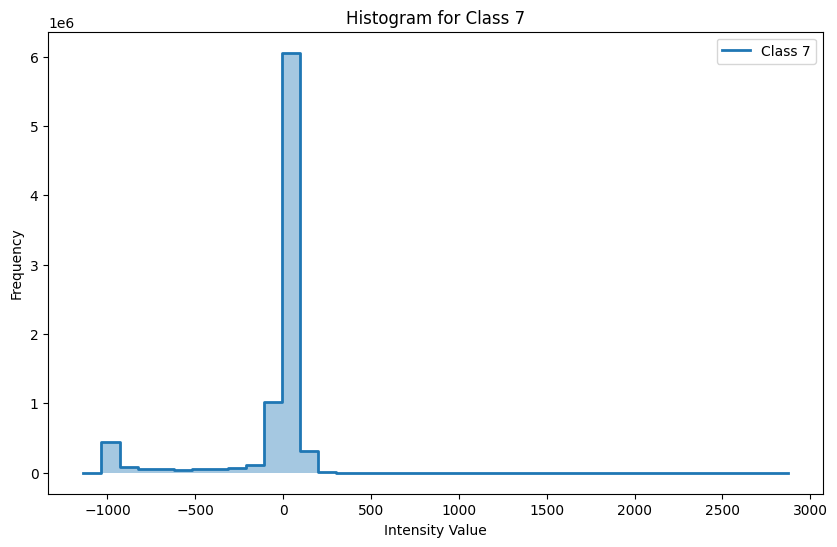

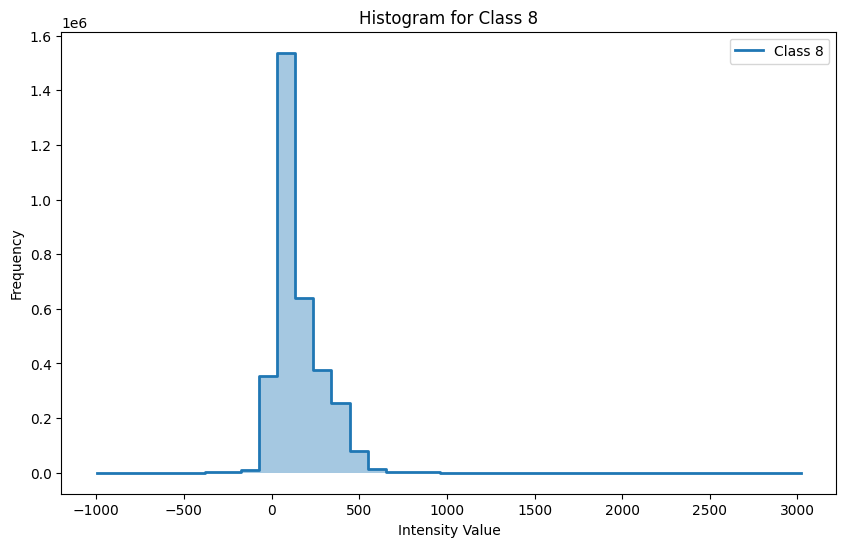

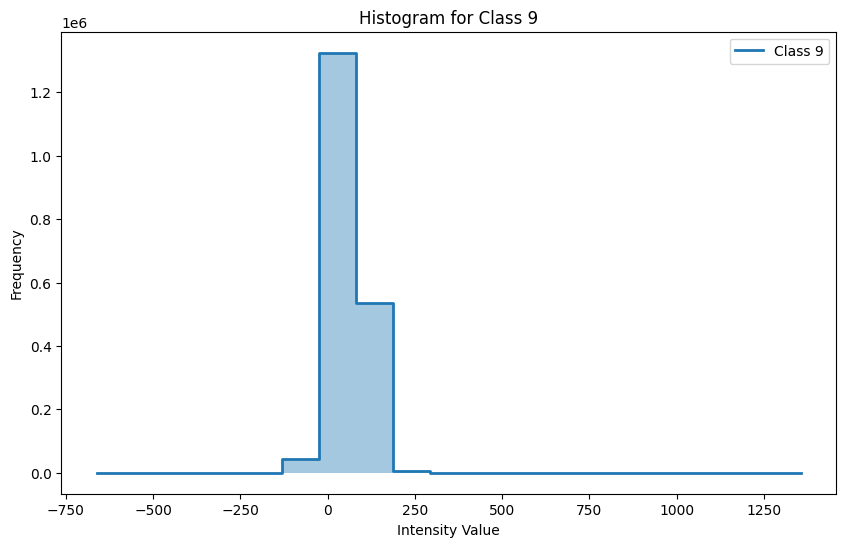

In [16]:
import matplotlib.pyplot as plt

# Assuming labels_hists is your dictionary of histograms and labels_bins contains the bin edges for each label
for label, hist_data in labels_hists.items():
    bins = labels_bins[label]
    # Calculate bin centers from edges for labeling or plotting purposes
    # bin_centers = (bins[:-1] + bins[1:]) / 2  # Only needed if you use plt.bar
    plt.figure(figsize=(10, 6))  # Create a new figure for each histogram
    # Using plt.step to show the histograms
    plt.step(bins[:-1], hist_data, where='post', label=f'Class {label}', linewidth=2)
    plt.fill_between(bins[:-1], hist_data, step='post', alpha=0.4)  # Optional: Fill under the step line
    
    plt.title(f'Histogram for Class {label}')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
